# LOGISTIC REGRESSION

# Problem Statement
An education company, X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

The company markets its courses on several websites and search engines like Google. When these people browse the courses and fill up a form providing their email address or phone number, they are classified to be a lead.
Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. 

X Education needs us to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers.

The company requires us to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. 

## Reading and Understanding Data

In [145]:
# Supressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [146]:
# Importing all required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [147]:
# Importing the dataset
leads = pd.read_csv('Leads.csv')
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Inspect Data

In [148]:
leads.shape

(9240, 37)

In [149]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

## Data Cleaning

In [150]:
# Looking at all the columns and rows
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

In [151]:
leads

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.00,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.50,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,Email Marked Spam,Saudi Arabia,IT Projects Management,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,High in Relevance,No,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,SMS Sent,India,Media and Advertising,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,wrong number given,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,SMS Sent,India,Business Administration,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,invalid number,Not Sure,No,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,SMS Sent,India,Human Resource Management,Online Search,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent


### Handling the Categorical Variables having 'Select' values.

After looking at the data, we have found that a few columns have the value **'Select'** which means that the customer has not selected any option in those columns. Let us look at those columns and replace the 'Select' values with proper data.

**The columns having 'Select' values are:**
1. City
2. Specialization
3. How did you hear about X Education
4. Lead Profile

In [152]:
# Checking the count of unique values in the 'City' column
leads.City.value_counts(normalize=True)

Mumbai                         0.412020
Select                         0.287596
Thane & Outskirts              0.096164
Other Cities                   0.087724
Other Cities of Maharashtra    0.058440
Other Metro Cities             0.048593
Tier II Cities                 0.009463
Name: City, dtype: float64

> We can see that 28% of the values in the City column have value as 'Select', let us replace these values with **'Other Cities'**

In [153]:
# Replacing the 'Select' value in City with NaN
leads.loc[leads.City == 'Select', 'City'] = 'Other Cities'

In [154]:
leads.City.value_counts(normalize=True)

Mumbai                         0.412020
Other Cities                   0.375320
Thane & Outskirts              0.096164
Other Cities of Maharashtra    0.058440
Other Metro Cities             0.048593
Tier II Cities                 0.009463
Name: City, dtype: float64

In [155]:
# Checking the count of unique values in the 'Specialization' column
leads.Specialization.value_counts(normalize = True)

Select                               0.248911
Finance Management                   0.125096
Human Resource Management            0.108690
Marketing Management                 0.107408
Operations Management                0.064471
Business Administration              0.051653
IT Projects Management               0.046911
Supply Chain Management              0.044732
Banking, Investment And Insurance    0.043322
Travel and Tourism                   0.026019
Media and Advertising                0.026019
International Business               0.022815
Healthcare Management                0.020379
Hospitality Management               0.014612
E-COMMERCE                           0.014355
Retail Management                    0.012817
Rural and Agribusiness               0.009357
E-Business                           0.007306
Services Excellence                  0.005127
Name: Specialization, dtype: float64

We can see that 24% of the data in the column 'Specialization' has the value 'Select'. This column tells us about the industry domain in which the customer worked before. So we can replace the 'Select' values to **NaN**.

In [156]:
leads.loc[leads.Specialization == 'Select', 'Specialization'] = 'Not Specified'

In [157]:
leads.Specialization.value_counts(normalize = True)

Not Specified                        0.248911
Finance Management                   0.125096
Human Resource Management            0.108690
Marketing Management                 0.107408
Operations Management                0.064471
Business Administration              0.051653
IT Projects Management               0.046911
Supply Chain Management              0.044732
Banking, Investment And Insurance    0.043322
Travel and Tourism                   0.026019
Media and Advertising                0.026019
International Business               0.022815
Healthcare Management                0.020379
Hospitality Management               0.014612
E-COMMERCE                           0.014355
Retail Management                    0.012817
Rural and Agribusiness               0.009357
E-Business                           0.007306
Services Excellence                  0.005127
Name: Specialization, dtype: float64

In [158]:
# Checking the count of unique values in the 'How did you hear about X Education' column
leads['How did you hear about X Education'].value_counts(normalize = True)

Select                   0.717048
Online Search            0.114887
Word Of Mouth            0.049481
Student of SomeSchool    0.044078
Other                    0.026447
Multiple Sources         0.021612
Advertisements           0.009953
Social Media             0.009527
Email                    0.003697
SMS                      0.003270
Name: How did you hear about X Education, dtype: float64

> We can see that 71% of the data in the column 'How did you hear about X Education' has the value 'Select'. Let's replace the 'Select' values to **NaN**.

In [159]:
leads.loc[leads['How did you hear about X Education'] == 'Select', 'How did you hear about X Education'] = np.nan

In [160]:
leads['How did you hear about X Education'].value_counts(normalize = True)

Online Search            0.406030
Word Of Mouth            0.174874
Student of SomeSchool    0.155779
Other                    0.093467
Multiple Sources         0.076382
Advertisements           0.035176
Social Media             0.033668
Email                    0.013065
SMS                      0.011558
Name: How did you hear about X Education, dtype: float64

In [161]:
# Checking the count of unique values in the 'Lead Profile' column
leads['Lead Profile'].value_counts(normalize = True)

Select                         0.634819
Potential Lead                 0.246976
Other Leads                    0.074567
Student of SomeSchool          0.036901
Lateral Student                0.003675
Dual Specialization Student    0.003062
Name: Lead Profile, dtype: float64

> We can see that 63% of the data in the column 'Lead Profile' has the value 'Select'. Let's replace the 'Select' values to **Potential Lead**, as most of the rows with these values have the corresponding occupation as **'Unemployed' or 'Student'** and these are the kind of people who are mostly looking for a career kick start and joining a course would really be a good option.

In [162]:
leads.loc[leads['Lead Profile'] == 'Select', 'Lead Profile'] = 'Potential Lead'

In [163]:
leads['Lead Profile'].value_counts(normalize = True)

Potential Lead                 0.881795
Other Leads                    0.074567
Student of SomeSchool          0.036901
Lateral Student                0.003675
Dual Specialization Student    0.003062
Name: Lead Profile, dtype: float64

### Null Values

In [164]:
# Checking for null values in columns
round(100*(leads.isnull().sum())/len(leads), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

We can see that, the columns **How did you hear about X Education, Lead Quality, Asymmetrique Activity Index, Asymmetrique Profile Index, Asymmetrique Activity Score, Asymmetrique Profile Score** have more than 40% of null values, so let's drop these columns. 

In [165]:
leads = leads.drop(['How did you hear about X Education','Lead Quality', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 
                    'Asymmetrique Activity Score', 'Asymmetrique Profile Score' ],axis = 1)

In [166]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 31 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [167]:
# Re-checking for null values in columns
round(100*(leads.isnull().sum())/len(leads), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

We can see that the columns **'Lead Source', 'TotalVisits', 'Country', 'Specialization', 'Page Views Per Visit', 'Last Activity, 'Lead Profile', 'City', 'What is your current occupation', 'What matters most to you in choosing a course', 'Tags', 'Lead Profile', 'City'** still have null values.

Before we handle these null values let's check for skewness in the categorical variables. 

### Skewness of Categories in Categorical Variables

In [168]:
# Identifying the Categorical Variables
leads.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums          

In [169]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 31 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [170]:
# Checking for skewed data in 'Lead Origin'
leads['Lead Origin'].value_counts(normalize=True)

Landing Page Submission    0.528788
API                        0.387446
Lead Add Form              0.077706
Lead Import                0.005952
Quick Add Form             0.000108
Name: Lead Origin, dtype: float64

In [171]:
leads['Lead Origin'].value_counts()

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

We can see here that the categories here are highly skewed, i.e., there is a huge difference between the categories 'Landing Page Submission', 'API', 'Lead Add Form' and 'Lead Import', 'Quick Add Form'. So let's remove the categories 'Lead Import' and 'Quick Add Form'

In [172]:
# Removing skewed categories in Lead Origin
leads = leads.drop(leads[leads['Lead Origin'] == 'Lead Import'].index)

In [173]:
leads = leads.drop(leads[leads['Lead Origin'] == 'Quick Add Form'].index)

In [174]:
leads['Lead Origin'].value_counts(normalize = True)

Landing Page Submission    0.532012
API                        0.389808
Lead Add Form              0.078179
Name: Lead Origin, dtype: float64

In [175]:
# Checking for skewed data in 'Lead Origin'
leads['Lead Source'].value_counts(normalize = True)

Google               0.313443
Direct Traffic       0.277923
Olark Chat           0.191803
Organic Search       0.126120
Reference            0.058361
Welingak Website     0.015519
Referral Sites       0.013661
bing                 0.000656
google               0.000546
Click2call           0.000437
Social Media         0.000219
Press_Release        0.000219
Live Chat            0.000219
Facebook             0.000109
blog                 0.000109
WeLearn              0.000109
testone              0.000109
NC_EDM               0.000109
youtubechannel       0.000109
welearnblog_Home     0.000109
Pay per Click Ads    0.000109
Name: Lead Source, dtype: float64

In [176]:
leads['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
bing                    6
google                  5
Click2call              4
Social Media            2
Press_Release           2
Live Chat               2
Facebook                1
blog                    1
WeLearn                 1
testone                 1
NC_EDM                  1
youtubechannel          1
welearnblog_Home        1
Pay per Click Ads       1
Name: Lead Source, dtype: int64

We can see that the data is high skewed as there is a lot of difference between 'Google','Direct Traffic','Olark Chat','Organic Search','Reference','Welingak Website','Referral Sites' and the rest of the categories.

In [177]:
#Removing skewed values from LEAD SOURCE column
leads = leads[leads['Lead Source'].isin(['Google','Direct Traffic','Olark Chat','Organic Search','Reference','Welingak Website','Referral Sites'])]

In [178]:
leads['Lead Source'].value_counts(normalize=True)

Google              0.314439
Direct Traffic      0.278807
Olark Chat          0.192413
Organic Search      0.126521
Reference           0.058546
Welingak Website    0.015568
Referral Sites      0.013705
Name: Lead Source, dtype: float64

In [179]:
leads.nunique()

Prospect ID                                      9121
Lead Number                                      9121
Lead Origin                                         3
Lead Source                                         7
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1726
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums          

In [180]:
# Checking for skewness in the COUNTRY column
leads['Country'].value_counts(normalize=True)

India                   0.957803
United States           0.010216
United Arab Emirates    0.007847
Singapore               0.003553
Saudi Arabia            0.002961
United Kingdom          0.002221
Australia               0.001925
Qatar                   0.001481
Bahrain                 0.001036
Hong Kong               0.001036
France                  0.000888
Oman                    0.000888
unknown                 0.000740
Nigeria                 0.000592
Kuwait                  0.000592
Germany                 0.000592
South Africa            0.000592
Canada                  0.000444
Sweden                  0.000444
Asia/Pacific Region     0.000296
Philippines             0.000296
China                   0.000296
Bangladesh              0.000296
Belgium                 0.000296
Netherlands             0.000296
Ghana                   0.000296
Uganda                  0.000296
Italy                   0.000296
Liberia                 0.000148
Vietnam                 0.000148
Switzerlan

We can see that the data is highly skewed in the Country column as 95% of the values belong to 'India', let us drop this column as using this column to build the model would wrongly influence results. 

In [181]:
leads = leads.drop(['Country'], axis = 1)

In [182]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9121 entries, 0 to 9239
Data columns (total 30 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9121 non-null   object 
 1   Lead Number                                    9121 non-null   int64  
 2   Lead Origin                                    9121 non-null   object 
 3   Lead Source                                    9121 non-null   object 
 4   Do Not Email                                   9121 non-null   object 
 5   Do Not Call                                    9121 non-null   object 
 6   Converted                                      9121 non-null   int64  
 7   TotalVisits                                    9015 non-null   float64
 8   Total Time Spent on Website                    9121 non-null   int64  
 9   Page Views Per Visit                           9015 

In [183]:
# Checking for categorical variables
leads.nunique()

Prospect ID                                      9121
Lead Number                                      9121
Lead Origin                                         3
Lead Source                                         7
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1726
Page Views Per Visit                              114
Last Activity                                      17
Specialization                                     19
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                   

In [184]:
# Checking for skewness in the 'Last Activity' column
leads['Last Activity'].value_counts(normalize=True)

Email Opened                    0.376051
SMS Sent                        0.299469
Olark Chat Conversation         0.107570
Page Visited on Website         0.069832
Converted to Lead               0.047145
Email Bounced                   0.035303
Email Link Clicked              0.029548
Form Submitted on Website       0.012838
Unreachable                     0.010181
Unsubscribed                    0.006419
Had a Phone Conversation        0.003320
Approached upfront              0.000996
View in browser link Clicked    0.000664
Email Received                  0.000221
Email Marked Spam               0.000221
Resubscribed to emails          0.000111
Visited Booth in Tradeshow      0.000111
Name: Last Activity, dtype: float64

In [185]:
# Removing the column due to data imbalance.
leads = leads.drop(['Last Activity'], axis = 1)

In [186]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9121 entries, 0 to 9239
Data columns (total 29 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9121 non-null   object 
 1   Lead Number                                    9121 non-null   int64  
 2   Lead Origin                                    9121 non-null   object 
 3   Lead Source                                    9121 non-null   object 
 4   Do Not Email                                   9121 non-null   object 
 5   Do Not Call                                    9121 non-null   object 
 6   Converted                                      9121 non-null   int64  
 7   TotalVisits                                    9015 non-null   float64
 8   Total Time Spent on Website                    9121 non-null   int64  
 9   Page Views Per Visit                           9015 

In [187]:
# Checking for skewness in the 'Specialization' column
leads['Specialization'].value_counts(normalize = True)

Not Specified                        0.243795
Finance Management                   0.125796
Human Resource Management            0.109032
Marketing Management                 0.108512
Operations Management                0.064847
Business Administration              0.051982
IT Projects Management               0.047563
Supply Chain Management              0.044964
Banking, Investment And Insurance    0.043925
Travel and Tourism                   0.026121
Media and Advertising                0.026121
International Business               0.023002
Healthcare Management                0.020403
Hospitality Management               0.014685
E-COMMERCE                           0.014165
Retail Management                    0.012995
Rural and Agribusiness               0.009487
E-Business                           0.007407
Services Excellence                  0.005198
Name: Specialization, dtype: float64

>No significant skewness found.

In [188]:
# Checking for skewness in the 'What is your current occupation' column
leads['What is your current occupation'].value_counts(normalize = True)

Unemployed              0.853711
Working Professional    0.108787
Student                 0.032233
Other                   0.002479
Housewife               0.001550
Businessman             0.001240
Name: What is your current occupation, dtype: float64

1. We can see that the data is highly skewed.
2. We can replace the values with 'Housewife' to 'Unemployed' and remove the categories, 'Other' and 'Businessman' as they have very less data.

In [189]:
# Dropping the categories
leads = leads.drop(leads[leads['What is your current occupation'] == 'Other'].index)
leads = leads.drop(leads[leads['What is your current occupation'] == 'Businessman'].index)

In [190]:
# Replacing the value 'Housewife' to 'Unemployed'
leads.loc[leads['What is your current occupation'] == 'Housewife', 'What is your current occupation'] = 'Unemployed'

In [191]:
leads['What is your current occupation'].value_counts(normalize = True)

Unemployed              0.858454
Working Professional    0.109193
Student                 0.032353
Name: What is your current occupation, dtype: float64

In [192]:
# Checking for skewness in the 'What matters most to you in choosing a course' column
leads['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6408
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

> **We can see that the data here is highly skewed. We can drop this column.**

In [193]:
leads = leads.drop(['What matters most to you in choosing a course'], axis = 1)

In [194]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9097 entries, 0 to 9239
Data columns (total 28 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Prospect ID                               9097 non-null   object 
 1   Lead Number                               9097 non-null   int64  
 2   Lead Origin                               9097 non-null   object 
 3   Lead Source                               9097 non-null   object 
 4   Do Not Email                              9097 non-null   object 
 5   Do Not Call                               9097 non-null   object 
 6   Converted                                 9097 non-null   int64  
 7   TotalVisits                               8992 non-null   float64
 8   Total Time Spent on Website               9097 non-null   int64  
 9   Page Views Per Visit                      8992 non-null   float64
 10  Specialization                      

In [195]:
# Checking for skewness in the 'Tags' column
leads.Tags.value_counts(normalize=True)

Will revert after reading the email                  0.349404
Ringing                                              0.203733
Interested in other courses                          0.087610
Already a student                                    0.079661
Closed by Horizzon                                   0.061517
switched off                                         0.041299
Busy                                                 0.031968
Lost to EINS                                         0.030067
Not doing further education                          0.024538
Interested  in full time MBA                         0.020045
Graduation in progress                               0.018663
invalid number                                       0.014342
Diploma holder (Not Eligible)                        0.010886
wrong number given                                   0.007949
opp hangup                                           0.005702
number not provided                                  0.004320
in touch

In [196]:
leads.Tags.value_counts()

Will revert after reading the email                  2022
Ringing                                              1179
Interested in other courses                           507
Already a student                                     461
Closed by Horizzon                                    356
switched off                                          239
Busy                                                  185
Lost to EINS                                          174
Not doing further education                           142
Interested  in full time MBA                          116
Graduation in progress                                108
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     46
opp hangup                                             33
number not provided                                    25
in touch with EINS                                     12
Lost to Others

> The data here is highly imbalanced and looking the dataset, it also has around 36% of null values, so lets drop this column as keeping this column would majorly influence the regression model.

In [197]:
leads = leads.drop(['Tags'], axis = 1)

In [198]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9097 entries, 0 to 9239
Data columns (total 27 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Prospect ID                               9097 non-null   object 
 1   Lead Number                               9097 non-null   int64  
 2   Lead Origin                               9097 non-null   object 
 3   Lead Source                               9097 non-null   object 
 4   Do Not Email                              9097 non-null   object 
 5   Do Not Call                               9097 non-null   object 
 6   Converted                                 9097 non-null   int64  
 7   TotalVisits                               8992 non-null   float64
 8   Total Time Spent on Website               9097 non-null   int64  
 9   Page Views Per Visit                      8992 non-null   float64
 10  Specialization                      

In [199]:
leads.nunique()

Prospect ID                                 9097
Lead Number                                 9097
Lead Origin                                    3
Lead Source                                    7
Do Not Email                                   2
Do Not Call                                    2
Converted                                      2
TotalVisits                                   41
Total Time Spent on Website                 1724
Page Views Per Visit                         114
Specialization                                19
What is your current occupation                3
Search                                         2
Magazine                                       1
Newspaper Article                              2
X Education Forums                             2
Newspaper                                      2
Digital Advertisement                          2
Through Recommendations                        2
Receive More Updates About Our Courses         1
Update me on Supply 

In [200]:
# Checking skewness for 'Lead Profile'
leads['Lead Profile'].value_counts(normalize=True)

Potential Lead                 0.881922
Other Leads                    0.073935
Student of SomeSchool          0.037280
Lateral Student                0.003744
Dual Specialization Student    0.003120
Name: Lead Profile, dtype: float64

In [201]:
leads = leads.drop(['Lead Profile'], axis = 1)

> We can drop the categories 'Lateral Student' and 'Dual Specialization Student'.

In [202]:
# Checking skewness in City column
leads['City'].value_counts(normalize = True)

Mumbai                         0.413641
Other Cities                   0.374854
Thane & Outskirts              0.096707
Other Cities of Maharashtra    0.056488
Other Metro Cities             0.048809
Tier II Cities                 0.009501
Name: City, dtype: float64

In [203]:
# Dropping the rows having 'Teir II Cities' as it has very less data.
leads = leads.drop(leads[leads['City'] == 'Tier II Cities'].index)

In [204]:
leads['City'].value_counts()

Mumbai                         3178
Other Cities                   2880
Thane & Outskirts               743
Other Cities of Maharashtra     434
Other Metro Cities              375
Name: City, dtype: int64

In [205]:
# Checking skewness in City column
leads['Last Notable Activity'].value_counts(normalize = True)

Modified                        0.366800
Email Opened                    0.306516
SMS Sent                        0.235594
Page Visited on Website         0.034464
Olark Chat Conversation         0.020279
Email Link Clicked              0.019060
Email Bounced                   0.006649
Unsubscribed                    0.004876
Unreachable                     0.003435
Had a Phone Conversation        0.001551
Email Marked Spam               0.000222
Approached upfront              0.000111
View in browser link Clicked    0.000111
Resubscribed to emails          0.000111
Email Received                  0.000111
Form Submitted on Website       0.000111
Name: Last Notable Activity, dtype: float64

In [206]:
# Dropping the category rows with less percentage of data.Dual Specialization Student
leads = leads.drop(leads[(leads['Last Notable Activity'] == 'Page Visited on Website') | 
                         (leads['Last Notable Activity'] == 'Olark Chat Conversation') |
                         (leads['Last Notable Activity'] == 'Email Link Clicked') | 
                         (leads['Last Notable Activity'] == 'Email Bounced') |
                         (leads['Last Notable Activity'] == 'Unsubscribed') | 
                         (leads['Last Notable Activity'] == 'Unreachable') |
                         (leads['Last Notable Activity'] == 'Had a Phone Conversation') | 
                         (leads['Last Notable Activity'] == 'Email Marked Spam') |
                         (leads['Last Notable Activity'] == 'Page Visited on Website') | 
                         (leads['Last Notable Activity'] == 'Olark Chat Conversation') |
                         (leads['Last Notable Activity'] == 'Email Link Clicked') | 
                         (leads['Last Notable Activity'] == 'Email Received') |
                         (leads['Last Notable Activity'] == 'Form Submitted on Website') | 
                         (leads['Last Notable Activity'] == 'View in browser link Clicked') |
                         (leads['Last Notable Activity'] == 'Approached upfront') | 
                         (leads['Last Notable Activity'] == 'Resubscribed to emails')].index)

In [207]:
leads['Last Notable Activity'].value_counts()

Modified        3310
Email Opened    2766
SMS Sent        2126
Name: Last Notable Activity, dtype: int64

In [208]:
leads.nunique()

Prospect ID                                 8202
Lead Number                                 8202
Lead Origin                                    3
Lead Source                                    7
Do Not Email                                   2
Do Not Call                                    2
Converted                                      2
TotalVisits                                   35
Total Time Spent on Website                 1687
Page Views Per Visit                          89
Specialization                                19
What is your current occupation                3
Search                                         2
Magazine                                       1
Newspaper Article                              2
X Education Forums                             2
Newspaper                                      2
Digital Advertisement                          2
Through Recommendations                        2
Receive More Updates About Our Courses         1
Update me on Supply 

### Checking for skewness in binary variables

In [209]:
leads['Do Not Email'].value_counts(normalize=True)

No     0.934894
Yes    0.065106
Name: Do Not Email, dtype: float64

In [210]:
leads = leads.drop(['Do Not Email'], axis = 1)

In [211]:
leads['Do Not Call'].value_counts(normalize=True)

No     0.999756
Yes    0.000244
Name: Do Not Call, dtype: float64

In [212]:
leads = leads.drop(['Do Not Call'], axis = 1)

In [213]:
leads['Search'].value_counts(normalize=True)

No     0.998415
Yes    0.001585
Name: Search, dtype: float64

In [214]:
leads = leads.drop(['Search'], axis = 1)

In [215]:
leads['Magazine'].value_counts()

No    8202
Name: Magazine, dtype: int64

In [216]:
leads = leads.drop(['Magazine'], axis = 1)

In [217]:
leads['Newspaper Article'].value_counts(normalize=True)

No     0.999756
Yes    0.000244
Name: Newspaper Article, dtype: float64

In [218]:
leads = leads.drop(['Newspaper Article'], axis = 1)

In [219]:
leads['X Education Forums'].value_counts()

No     8201
Yes       1
Name: X Education Forums, dtype: int64

In [220]:
leads = leads.drop(['X Education Forums'], axis = 1)

In [221]:
leads['Digital Advertisement'].value_counts(normalize = True)

No     0.999512
Yes    0.000488
Name: Digital Advertisement, dtype: float64

In [222]:
leads = leads.drop(['Digital Advertisement'], axis = 1)

In [223]:
leads['Newspaper'].value_counts(normalize=True)

No     0.999878
Yes    0.000122
Name: Newspaper, dtype: float64

In [224]:
leads = leads.drop(['Newspaper'], axis =1)

In [225]:
leads['Through Recommendations'].value_counts(normalize=True)

No     0.99939
Yes    0.00061
Name: Through Recommendations, dtype: float64

In [226]:
leads = leads.drop(['Through Recommendations'], axis = 1)

In [227]:
leads['Receive More Updates About Our Courses'].value_counts()

No    8202
Name: Receive More Updates About Our Courses, dtype: int64

In [228]:
leads = leads.drop(['Receive More Updates About Our Courses'], axis = 1)

> As we can see the binary variables **Search, Magazine, Newspaper Article, X Education Forums, Newspaper, Digital, Advertisement, Through Recommendations, Receive More Updates About Our Courses** have been dropped as these variables were highly skewed.

In [229]:
# Dropping variables with just one category as it would influence the data.
leads = leads.drop(['Update me on Supply Chain Content','Get updates on DM Content',
                    'I agree to pay the amount through cheque'], axis = 1)

In [230]:
# Checking for skewness in 'A free copy of Mastering The Interview'
leads['A free copy of Mastering The Interview'].value_counts(normalize=True)

No     0.687393
Yes    0.312607
Name: A free copy of Mastering The Interview, dtype: float64

> No skewed data.

### Re-checking the Null Values

In [231]:
# Re-Checking for null values in columns
round(100*(leads.isnull().sum())/len(leads), 2)

Prospect ID                                0.00
Lead Number                                0.00
Lead Origin                                0.00
Lead Source                                0.00
Converted                                  0.00
TotalVisits                                1.28
Total Time Spent on Website                0.00
Page Views Per Visit                       1.28
Specialization                            14.94
What is your current occupation           28.51
City                                      14.83
A free copy of Mastering The Interview     0.00
Last Notable Activity                      0.00
dtype: float64

We can see that the columns **What is your current occupation & Lead Profile** have 28% of null values.

In [232]:
# Checking the data of column - What is your current occupation, to impute appropriate null values.
leads['What is your current occupation'].describe()

count           5864
unique             3
top       Unemployed
freq            5026
Name: What is your current occupation, dtype: object

We can clearly see that most of the values in this column are 'Unemployed', hence we can impute null values in this data to 'Unemployed' based on Mode Imputation.

In [233]:
# Imputing the null values
leads['What is your current occupation'] = leads['What is your current occupation'].replace(to_replace = np.nan, value = 'Unemployed')

In [234]:
# Re-Checking for null values in columns
round(100*(leads.isnull().sum())/len(leads), 2)

Prospect ID                                0.00
Lead Number                                0.00
Lead Origin                                0.00
Lead Source                                0.00
Converted                                  0.00
TotalVisits                                1.28
Total Time Spent on Website                0.00
Page Views Per Visit                       1.28
Specialization                            14.94
What is your current occupation            0.00
City                                      14.83
A free copy of Mastering The Interview     0.00
Last Notable Activity                      0.00
dtype: float64

We can clearly see that most of the values in this column are 'Potential Lead', hence we can impute null values in this data to 'Potential Lead' based on Mode Imputation.

In [235]:
# Re-Checking for null values in columns
round(100*(leads.isnull().sum())/len(leads), 2)

Prospect ID                                0.00
Lead Number                                0.00
Lead Origin                                0.00
Lead Source                                0.00
Converted                                  0.00
TotalVisits                                1.28
Total Time Spent on Website                0.00
Page Views Per Visit                       1.28
Specialization                            14.94
What is your current occupation            0.00
City                                      14.83
A free copy of Mastering The Interview     0.00
Last Notable Activity                      0.00
dtype: float64

In [236]:
# Dropping the null values from the columns having less than 15% of null values.
leads = leads.dropna(subset = ['TotalVisits','Page Views Per Visit','Specialization','City'])
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0.0,0,0.0,Not Specified,Unemployed,Other Cities,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,5.0,674,2.5,Not Specified,Unemployed,Other Cities,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Business Administration,Student,Mumbai,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Media and Advertising,Unemployed,Mumbai,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Not Specified,Unemployed,Mumbai,No,Modified


In [237]:
round(100*(leads.isnull().sum())/len(leads), 2)

Prospect ID                               0.0
Lead Number                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Specialization                            0.0
What is your current occupation           0.0
City                                      0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

### Dropping unneccessary columns

In [238]:
leads['Lead Number'].value_counts()

585722    1
580126    1
613769    1
607626    1
642443    1
         ..
598777    1
580350    1
588546    1
652035    1
641025    1
Name: Lead Number, Length: 6863, dtype: int64

In [239]:
#Dropping the column 'Prospect ID' as it has no readable values.
leads = leads.drop(['Prospect ID'], axis = 1)
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6863 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Number                             6863 non-null   int64  
 1   Lead Origin                             6863 non-null   object 
 2   Lead Source                             6863 non-null   object 
 3   Converted                               6863 non-null   int64  
 4   TotalVisits                             6863 non-null   float64
 5   Total Time Spent on Website             6863 non-null   int64  
 6   Page Views Per Visit                    6863 non-null   float64
 7   Specialization                          6863 non-null   object 
 8   What is your current occupation         6863 non-null   object 
 9   City                                    6863 non-null   object 
 10  A free copy of Mastering The Interview  6863 non-null   obje

In [240]:
#Dropping the column 'Total Time Spent on Website' as we cannot peform Logistic Regression on Time Series Data.
leads = leads.drop(['Total Time Spent on Website'], axis = 1)
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6863 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Number                             6863 non-null   int64  
 1   Lead Origin                             6863 non-null   object 
 2   Lead Source                             6863 non-null   object 
 3   Converted                               6863 non-null   int64  
 4   TotalVisits                             6863 non-null   float64
 5   Page Views Per Visit                    6863 non-null   float64
 6   Specialization                          6863 non-null   object 
 7   What is your current occupation         6863 non-null   object 
 8   City                                    6863 non-null   object 
 9   A free copy of Mastering The Interview  6863 non-null   object 
 10  Last Notable Activity                   6863 non-null   obje

In [241]:
leads.head()

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Page Views Per Visit,Specialization,What is your current occupation,City,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,0,0.0,0.0,Not Specified,Unemployed,Other Cities,No,Modified
1,660728,API,Organic Search,0,5.0,2.5,Not Specified,Unemployed,Other Cities,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,1,2.0,2.0,Business Administration,Student,Mumbai,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,1.0,1.0,Media and Advertising,Unemployed,Mumbai,No,Modified
4,660681,Landing Page Submission,Google,1,2.0,1.0,Not Specified,Unemployed,Mumbai,No,Modified


### Checking the number of retained rows, after DATA CLEANING

In [242]:
retained = len(leads.index)
print(retained)

6863


In [243]:
retainedp = round(100*(retained/9240),2)
print(retainedp)

74.27


In [244]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6863 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Number                             6863 non-null   int64  
 1   Lead Origin                             6863 non-null   object 
 2   Lead Source                             6863 non-null   object 
 3   Converted                               6863 non-null   int64  
 4   TotalVisits                             6863 non-null   float64
 5   Page Views Per Visit                    6863 non-null   float64
 6   Specialization                          6863 non-null   object 
 7   What is your current occupation         6863 non-null   object 
 8   City                                    6863 non-null   object 
 9   A free copy of Mastering The Interview  6863 non-null   object 
 10  Last Notable Activity                   6863 non-null   obje

## EDA

### Outlier Analysis

In [245]:
# Checking for continuous variables in the data
leads.nunique()

Lead Number                               6863
Lead Origin                                  3
Lead Source                                  7
Converted                                    2
TotalVisits                                 35
Page Views Per Visit                        87
Specialization                              19
What is your current occupation              3
City                                         5
A free copy of Mastering The Interview       2
Last Notable Activity                        3
dtype: int64

**The continuous variables are:**
1. TotalVisits
2. Page Views Per Visit                          

In [246]:
# Checking for outliers
num_leads = leads[['TotalVisits','Page Views Per Visit']]
num_leads.head()

,TotalVisits,Page Views Per Visit
0,0.0,0.0
1,5.0,2.5
2,2.0,2.0
3,1.0,1.0
4,2.0,1.0


In [247]:
num_leads.describe()

,TotalVisits,Page Views Per Visit
count,6863.000000,6863.000000
mean,3.576424,2.629601
std,3.394401,2.167662
min,0.000000,0.000000
25%,2.000000,1.330000
50%,3.000000,2.000000
75%,5.000000,4.000000
max,55.000000,55.000000


We can see from the statistical table that there are outliers in the data.

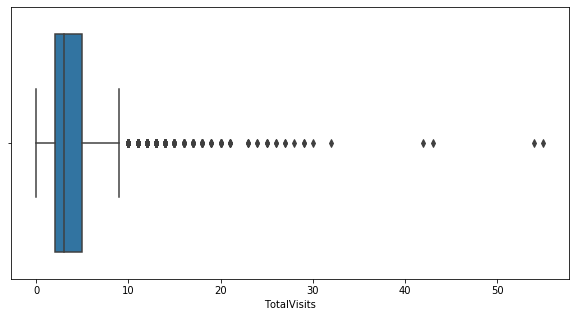

In [248]:
# Visualizing Outliers for 'TotalVisits'
plt.figure(figsize = (10, 5))
sns.boxplot(leads['TotalVisits'])
plt.show()

In [249]:
# Checking the outliers at quantile level.
print(leads['TotalVisits'].quantile([.90,.95,.96,.97,.98,.99,1]))

0.90     7.0
0.95     9.0
0.96    10.0
0.97    11.0
0.98    13.0
0.99    15.0
1.00    55.0
Name: TotalVisits, dtype: float64


> We can see that there is lot of difference between the 99th quantile and the 100th quantile. Let's cap the values at the 99th quantile.

In [250]:
# Capping outliers in exports
leads.loc[leads.TotalVisits>leads.TotalVisits.quantile(.99),"TotalVisits"] = leads.TotalVisits.quantile(.99)

In [251]:
print(leads['TotalVisits'].quantile([.75,.85,.95,.97,.98,.99,1]))

0.75     5.0
0.85     6.0
0.95     9.0
0.97    11.0
0.98    13.0
0.99    15.0
1.00    15.0
Name: TotalVisits, dtype: float64


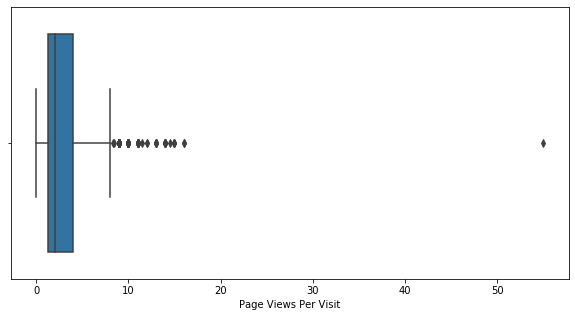

In [252]:
# Visualizing Outliers for 'Page Views Per Visit'
plt.figure(figsize = (10, 5))
sns.boxplot(leads['Page Views Per Visit'])
plt.show()

In [253]:
# Checking the outliers at quantile level.
print(leads['Page Views Per Visit'].quantile([.75,.85,.90,.95,.96,.97,.98,.99,1]))

0.75     4.0
0.85     4.5
0.90     5.0
0.95     6.0
0.96     7.0
0.97     7.0
0.98     8.0
0.99     9.0
1.00    55.0
Name: Page Views Per Visit, dtype: float64


> We can see that there is lot of difference between the 99th quantile and the 100th quantile. Let's cap the values at the 99th quantile.

In [254]:
# Capping outliers in exports
leads.loc[leads['Page Views Per Visit'] > 
          leads['TotalVisits'].quantile(.99),"Page Views Per Visit"] = leads['Page Views Per Visit'].quantile(.99)

In [255]:
print(leads['TotalVisits'].quantile([.75,.85,.95,.97,.98,.99,1]))

0.75     5.0
0.85     6.0
0.95     9.0
0.97    11.0
0.98    13.0
0.99    15.0
1.00    15.0
Name: TotalVisits, dtype: float64


In [256]:
num_leads = leads[['TotalVisits','Page Views Per Visit']]
num_leads.describe()

,TotalVisits,Page Views Per Visit
count,6863.000000,6863.000000
mean,3.510418,2.620858
std,2.988538,2.065098
min,0.000000,0.000000
25%,2.000000,1.330000
50%,3.000000,2.000000
75%,5.000000,4.000000
max,15.000000,15.000000


**Outliers have been treated.**

## Data Preparation

In [257]:
leads.nunique()

Lead Number                               6863
Lead Origin                                  3
Lead Source                                  7
Converted                                    2
TotalVisits                                 16
Page Views Per Visit                        85
Specialization                              19
What is your current occupation              3
City                                         5
A free copy of Mastering The Interview       2
Last Notable Activity                        3
dtype: int64

In [258]:
leads['A free copy of Mastering The Interview'].value_counts()

No     4302
Yes    2561
Name: A free copy of Mastering The Interview, dtype: int64

### Coverting Binary variables from Yes/No to 0 and 1

In [259]:
# List of variables to map

varlist =  ['A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
leads[varlist] = leads[varlist].apply(binary_map)

In [260]:
leads.head()

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Page Views Per Visit,Specialization,What is your current occupation,City,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,0,0.0,0.0,Not Specified,Unemployed,Other Cities,0,Modified
1,660728,API,Organic Search,0,5.0,2.5,Not Specified,Unemployed,Other Cities,0,Email Opened
2,660727,Landing Page Submission,Direct Traffic,1,2.0,2.0,Business Administration,Student,Mumbai,1,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,1.0,1.0,Media and Advertising,Unemployed,Mumbai,0,Modified
4,660681,Landing Page Submission,Google,1,2.0,1.0,Not Specified,Unemployed,Mumbai,0,Modified


In [261]:
# Making a copy of the original data, before creating the dummy variables.
leads_final = leads.copy()

### For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [262]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(leads[['Lead Origin', 'Lead Source', 'Specialization', 'What is your current occupation',
                               'City','Last Notable Activity']], drop_first=True)

# Adding the results to the master dataframe
leads = pd.concat([leads, dummy1], axis=1)

In [263]:
leads.head()

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Page Views Per Visit,Specialization,What is your current occupation,City,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not Specified,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,Last Notable Activity_Modified,Last Notable Activity_SMS Sent
0,660737,API,Olark Chat,0,0.0,0.0,Not Specified,Unemployed,Other Cities,0,Modified,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0
1,660728,API,Organic Search,0,5.0,2.5,Not Specified,Unemployed,Other Cities,0,Email Opened,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2,660727,Landing Page Submission,Direct Traffic,1,2.0,2.0,Business Administration,Student,Mumbai,1,Email Opened,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,660719,Landing Page Submission,Direct Traffic,0,1.0,1.0,Media and Advertising,Unemployed,Mumbai,0,Modified,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,660681,Landing Page Submission,Google,1,2.0,1.0,Not Specified,Unemployed,Mumbai,0,Modified,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [264]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6863 entries, 0 to 9239
Data columns (total 45 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Lead Number                                           6863 non-null   int64  
 1   Lead Origin                                           6863 non-null   object 
 2   Lead Source                                           6863 non-null   object 
 3   Converted                                             6863 non-null   int64  
 4   TotalVisits                                           6863 non-null   float64
 5   Page Views Per Visit                                  6863 non-null   float64
 6   Specialization                                        6863 non-null   object 
 7   What is your current occupation                       6863 non-null   object 
 8   City                                                  6863

In [265]:
#Renaming columns appropriately 
leads = leads.rename(columns = {'Lead Origin_Landing Page Submission' : 'Origin_Landing Page Submission', 
                     'Lead Origin_Lead Add Form':'Origin_Lead Add Form','Lead Source_Google' : 'Source_Google', 
                     'Lead Source_Olark Chat':'Source_Olark Chat',
                     'Lead Source_Organic Search':'Source_Organic Search','Lead Source_Reference':'Source_Reference',
                     'Lead Source_Welingak Website':'Source_Welingak Website','Referral Sites':'Source_Referral Sites',
                     'What is your current occupation_Unemployed':'Unemployed_Occupation',
                     'What is your current occupation_Working Professional':'Working Professional_Occupation',
                     'City_Other Cities' : 'Other Cities', 
                     'City_Other Cities of Maharashtra':'Other Cities of Maharashtra',
                     'City_Other Metro Cities' : 'Other Metro Cities', 
                     'City_Thane & Outskirts':'Thane & Outskirts','Activity_Modified':'Activity_Modified',
                     'Last Notable Activity_SMS Sent':'Last Notable Activity_SMS Sent'})

In [266]:
leads.head()

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Page Views Per Visit,Specialization,What is your current occupation,City,A free copy of Mastering The Interview,Last Notable Activity,Origin_Landing Page Submission,Origin_Lead Add Form,Source_Google,Source_Olark Chat,Source_Organic Search,Source_Reference,Lead Source_Referral Sites,Source_Welingak Website,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not Specified,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Unemployed_Occupation,Working Professional_Occupation,Other Cities,Other Cities of Maharashtra,Other Metro Cities,Thane & Outskirts,Last Notable Activity_Modified,Last Notable Activity_SMS Sent
0,660737,API,Olark Chat,0,0.0,0.0,Not Specified,Unemployed,Other Cities,0,Modified,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0
1,660728,API,Organic Search,0,5.0,2.5,Not Specified,Unemployed,Other Cities,0,Email Opened,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2,660727,Landing Page Submission,Direct Traffic,1,2.0,2.0,Business Administration,Student,Mumbai,1,Email Opened,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,660719,Landing Page Submission,Direct Traffic,0,1.0,1.0,Media and Advertising,Unemployed,Mumbai,0,Modified,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,660681,Landing Page Submission,Google,1,2.0,1.0,Not Specified,Unemployed,Mumbai,0,Modified,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [267]:
leads.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Converted', 'TotalVisits',
       'Page Views Per Visit', 'Specialization',
       'What is your current occupation', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity',
       'Origin_Landing Page Submission', 'Origin_Lead Add Form',
       'Source_Google', 'Source_Olark Chat', 'Source_Organic Search',
       'Source_Reference', 'Lead Source_Referral Sites',
       'Source_Welingak Website', 'Specialization_Business Administration',
       'Specialization_E-Business', 'Specialization_E-COMMERCE',
       'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising', 'Specialization_Not Specified',
   

In [268]:
# Dropping original column
leads = leads.drop(['Lead Origin', 'Lead Source', 'Specialization',
                    'What is your current occupation', 'City','Last Notable Activity'], axis = 1)

In [269]:
leads.head()

,Lead Number,Converted,TotalVisits,Page Views Per Visit,A free copy of Mastering The Interview,Origin_Landing Page Submission,Origin_Lead Add Form,Source_Google,Source_Olark Chat,Source_Organic Search,Source_Reference,Lead Source_Referral Sites,Source_Welingak Website,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not Specified,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Unemployed_Occupation,Working Professional_Occupation,Other Cities,Other Cities of Maharashtra,Other Metro Cities,Thane & Outskirts,Last Notable Activity_Modified,Last Notable Activity_SMS Sent
0,660737,0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0
1,660728,0,5.0,2.5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2,660727,1,2.0,2.0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,660719,0,1.0,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,660681,1,2.0,1.0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [270]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6863 entries, 0 to 9239
Data columns (total 39 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Lead Number                               6863 non-null   int64  
 1   Converted                                 6863 non-null   int64  
 2   TotalVisits                               6863 non-null   float64
 3   Page Views Per Visit                      6863 non-null   float64
 4   A free copy of Mastering The Interview    6863 non-null   int64  
 5   Origin_Landing Page Submission            6863 non-null   uint8  
 6   Origin_Lead Add Form                      6863 non-null   uint8  
 7   Source_Google                             6863 non-null   uint8  
 8   Source_Olark Chat                         6863 non-null   uint8  
 9   Source_Organic Search                     6863 non-null   uint8  
 10  Source_Reference                    

In [271]:
## Checking the Conversion Rate
converted = (sum(leads['Converted'])/len(leads['Converted'].index))*100
converted

43.858370974792365

**We currently have 43% of conversion rate for Leads.**

## Checking for Correlation

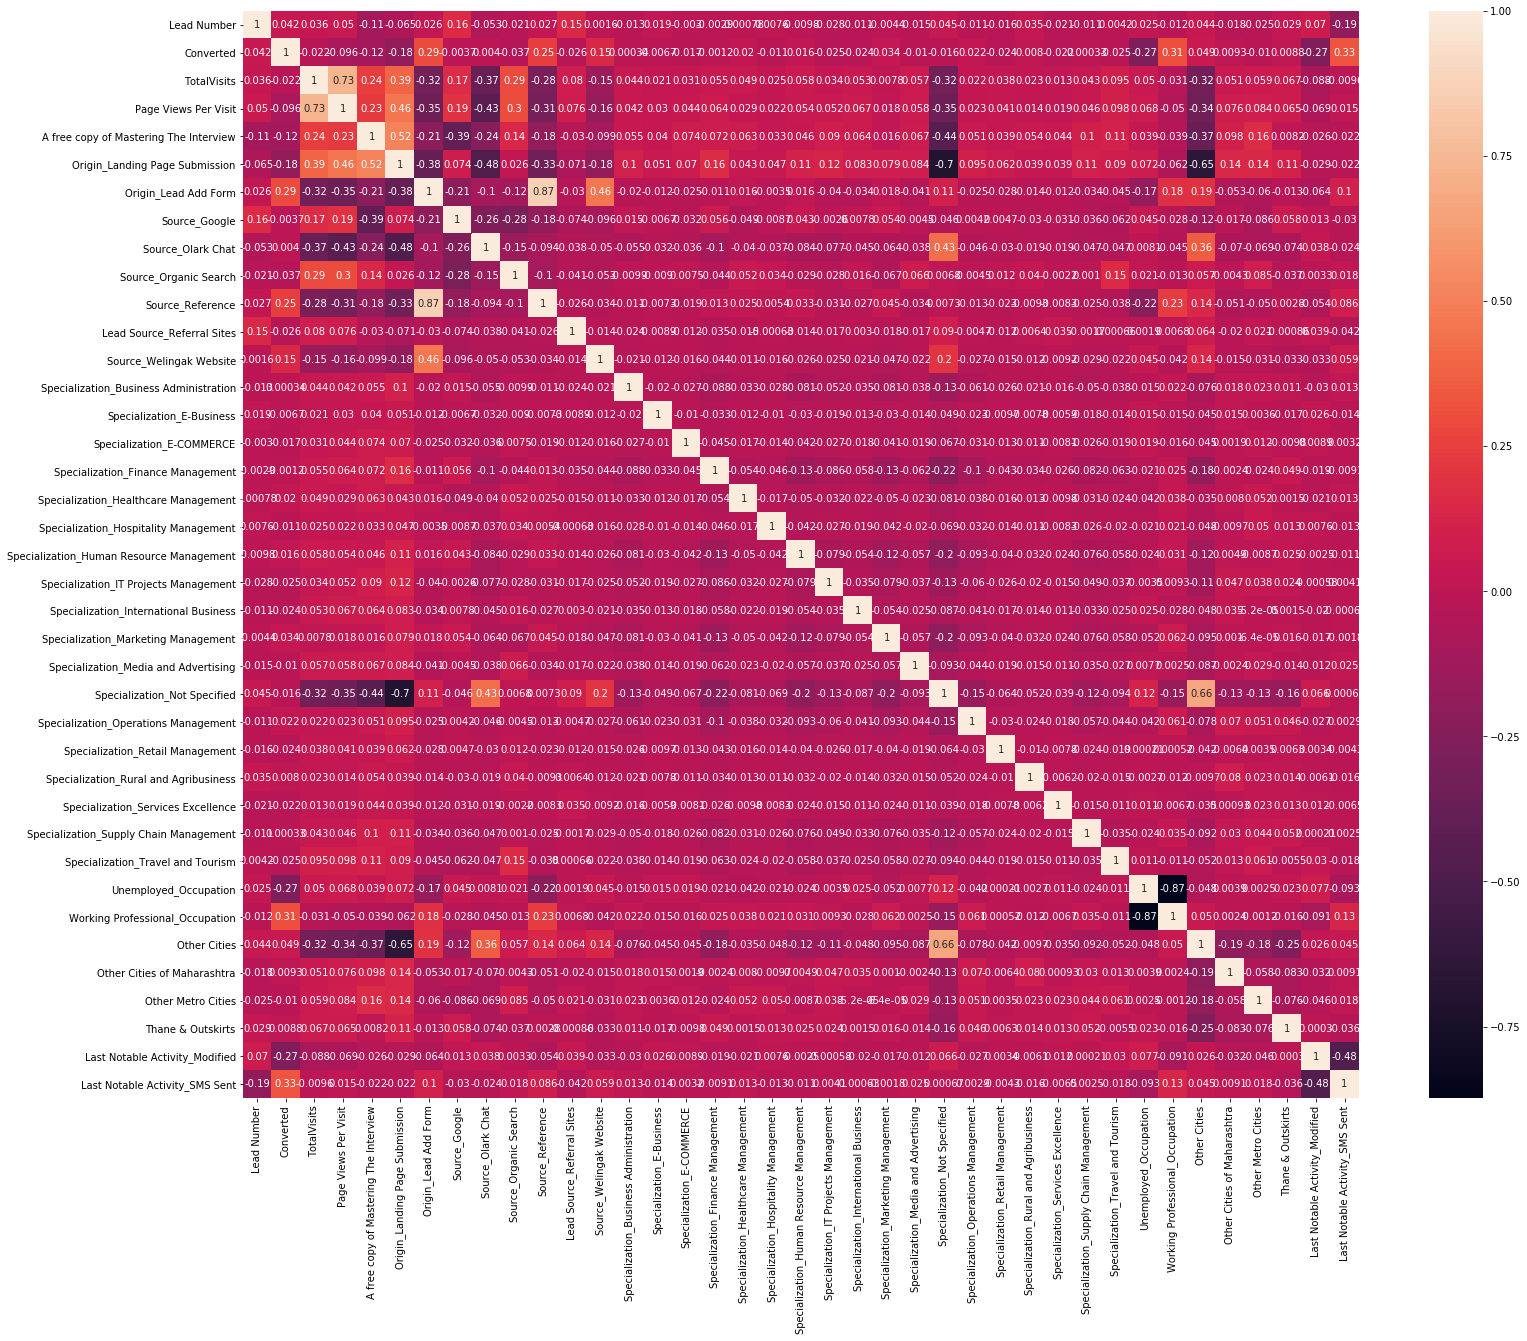

In [272]:
# Let's see the correlation matrix 
plt.figure(figsize = (25,20))        # Size of the figure
sns.heatmap(leads.corr(),annot = True)
plt.show()

In [273]:
# Dropping highly correlated variables
leads = leads.drop(['Page Views Per Visit','Specialization_Not Specified','Unemployed_Occupation'], axis = 1)

In [274]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6863 entries, 0 to 9239
Data columns (total 36 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Lead Number                               6863 non-null   int64  
 1   Converted                                 6863 non-null   int64  
 2   TotalVisits                               6863 non-null   float64
 3   A free copy of Mastering The Interview    6863 non-null   int64  
 4   Origin_Landing Page Submission            6863 non-null   uint8  
 5   Origin_Lead Add Form                      6863 non-null   uint8  
 6   Source_Google                             6863 non-null   uint8  
 7   Source_Olark Chat                         6863 non-null   uint8  
 8   Source_Organic Search                     6863 non-null   uint8  
 9   Source_Reference                          6863 non-null   uint8  
 10  Lead Source_Referral Sites          

## Train-Test Split

In [275]:
# Importing the required Library
from sklearn.model_selection import train_test_split

In [276]:
# Putting feature variable to X
X = leads.drop(['Converted','Lead Number'], axis=1)
X.head()

,TotalVisits,A free copy of Mastering The Interview,Origin_Landing Page Submission,Origin_Lead Add Form,Source_Google,Source_Olark Chat,Source_Organic Search,Source_Reference,Lead Source_Referral Sites,Source_Welingak Website,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Working Professional_Occupation,Other Cities,Other Cities of Maharashtra,Other Metro Cities,Thane & Outskirts,Last Notable Activity_Modified,Last Notable Activity_SMS Sent
0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,5.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,2.0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,2.0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [277]:
# Putting response variable to y
y = leads['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [278]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## Feature Scaling

In [279]:
from sklearn.preprocessing import StandardScaler

In [280]:
scaler = StandardScaler()

X_train[['TotalVisits']] = scaler.fit_transform(X_train[['TotalVisits']])
X_train.head()


,TotalVisits,A free copy of Mastering The Interview,Origin_Landing Page Submission,Origin_Lead Add Form,Source_Google,Source_Olark Chat,Source_Organic Search,Source_Reference,Lead Source_Referral Sites,Source_Welingak Website,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Working Professional_Occupation,Other Cities,Other Cities of Maharashtra,Other Metro Cities,Thane & Outskirts,Last Notable Activity_Modified,Last Notable Activity_SMS Sent
2363,-0.499505,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0
5471,0.848029,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
7845,2.869329,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
5804,-1.173271,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1
64,0.174262,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0


## Model Building

In [281]:
# Importing the required library
import statsmodels.api as sm

In [282]:
# Running the first training model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4804
Model:                            GLM   Df Residuals:                     4769
Model Family:                Binomial   Df Model:                           34
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2524.5
Date:                Sun, 19 Jul 2020   Deviance:                       5049.1
Time:                        21:01:36   Pearson chi2:                 4.77e+03
No. Iterations:                    19                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.6003      0.168     -3.567      0.000      -0.930      -0.270
TotalVisits                                  0.2129      0.042      5.072      0.000       0.131       0.295
A free copy of Mastering The Interview      -0.0246      0.102     -0.240      0.810      -0.225       0.176
Origin_Landing Page Submission              -0.9081      0.130     -6.972      0.000      -1.163      -0.653
Origin_Lead Add Form                       -20.6798   1.77e+04     -0.001      0.999   -3.48e+04    3.47e+04
Source_Google                                0.3002      0.109      2.760      0.006       0.087       0.513
Source_Olark Chat                            0.5695      0.155      3.671      0.000       0.265       0.874
Source_Organic Search                        0.0050      0.121      0.041      0.967      -0.233       0.243
Source_Reference                            23.1490   1.77e+04      0.001      0.999   -3.47e+04    3.48e+04
Lead Source_Referral Sites                  -0.0754      0.332     -0.227      0.820      -0.725       0.574
Source_Welingak Website                     25.9562   1.77e+04      0.001      0.999   -3.47e+04    3.48e+04
Specialization_Business Administration       0.4733      0.188      2.513      0.012       0.104       0.842
Specialization_E-Business                    0.8045      0.393      2.049      0.040       0.035       1.574
Specialization_E-COMMERCE                    0.5598      0.327      1.714      0.087      -0.080       1.200
Specialization_Finance Management            0.4911      0.147      3.340      0.001       0.203       0.779
Specialization_Healthcare Management         0.5440      0.269      2.024      0.043       0.017       1.071
Specialization_Hospitality Management       -0.0697      0.326     -0.214      0.831      -0.709       0.569
Specialization_Human Resource Management     0.6410      0.150      4.286      0.000       0.348       0.934
Specialization_IT Projects Management        0.2617      0.197      1.329      0.184      -0.124       0.647
Specialization_International Business        0.5046      0.243      2.079      0.038       0.029       0.980
Specialization_Marketing Management          0.6458      0.145      4.466      0.000       0.362       0.929
Specialization_Media and Advertising         0.4453      0.236      1.884      0.060      -0.018       0.909
Specialization_Operations Management         0.6127      0.173      3.533      0.000       0.273       0.953
Specialization_Retail Management            -0.0250      0.350     -0.072      0.943      -0.711       0.661
Specialization_Rural and Agribusiness        1.2335      0.381      3.237      0.001       0.487       1.980
Specialization_Services Excelle

In [283]:
X_train = X_train.drop('Origin_Lead Add Form', 1)
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4804
Model:                            GLM   Df Residuals:                     4770
Model Family:                Binomial   Df Model:                           33
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2525.3
Date:                Sun, 19 Jul 2020   Deviance:                       5050.6
Time:                        21:03:50   Pearson chi2:                 4.77e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.5981      0.168     -3.555      0.000      -0.928      -0.268
TotalVisits                                  0.2131      0.042      5.078      0.000       0.131       0.295
A free copy of Mastering The Interview      -0.0238      0.102     -0.232      0.817      -0.225       0.177
Origin_Landing Page Submission              -0.9065      0.130     -6.961      0.000      -1.162      -0.651
Source_Google                                0.3006      0.109      2.763      0.006       0.087       0.514
Source_Olark Chat                            0.5649      0.155      3.643      0.000       0.261       0.869
Source_Organic Search                        0.0047      0.121      0.038      0.969      -0.233       0.243
Source_Reference                             2.4705      0.255      9.684      0.000       1.971       2.971
Lead Source_Referral Sites                  -0.0761      0.331     -0.230      0.818      -0.726       0.574
Source_Welingak Website                      5.2759      1.017      5.186      0.000       3.282       7.270
Specialization_Business Administration       0.4687      0.188      2.490      0.013       0.100       0.838
Specialization_E-Business                    0.7993      0.393      2.036      0.042       0.030       1.569
Specialization_E-COMMERCE                    0.5551      0.327      1.700      0.089      -0.085       1.195
Specialization_Finance Management            0.4863      0.147      3.309      0.001       0.198       0.774
Specialization_Healthcare Management         0.5394      0.269      2.008      0.045       0.013       1.066
Specialization_Hospitality Management       -0.0744      0.326     -0.228      0.819      -0.713       0.564
Specialization_Human Resource Management     0.6363      0.149      4.258      0.000       0.343       0.929
Specialization_IT Projects Management        0.2565      0.197      1.304      0.192      -0.129       0.642
Specialization_International Business        0.5001      0.243      2.061      0.039       0.024       0.976
Specialization_Marketing Management          0.6359      0.144      4.408      0.000       0.353       0.919
Specialization_Media and Advertising         0.4403      0.236      1.863      0.062      -0.023       0.903
Specialization_Operations Management         0.6081      0.173      3.509      0.000       0.268       0.948
Specialization_Retail Management            -0.0302      0.350     -0.086      0.931      -0.716       0.656
Specialization_Rural and Agribusiness        1.2294      0.381      3.226      0.001       0.483       1.976
Specialization_Services Excellence           0.0963      0.489      0.197      0.844      -0.861       1.054
Specialization_Supply Chain Man

In [284]:
X_train = X_train.drop('Source_Organic Search', 1)
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4804
Model:                            GLM   Df Residuals:                     4771
Model Family:                Binomial   Df Model:                           32
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2525.3
Date:                Sun, 19 Jul 2020   Deviance:                       5050.6
Time:                        21:04:29   Pearson chi2:                 4.77e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.5959      0.158     -3.762      0.000      -0.906      -0.285
TotalVisits                                  0.2136      0.040      5.311      0.000       0.135       0.292
A free copy of Mastering The Interview      -0.0244      0.101     -0.241      0.810      -0.223       0.174
Origin_Landing Page Submission              -0.9073      0.129     -7.059      0.000      -1.159      -0.655
Source_Google                                0.2987      0.097      3.071      0.002       0.108       0.489
Source_Olark Chat                            0.5630      0.146      3.851      0.000       0.276       0.849
Source_Reference                             2.4686      0.250      9.863      0.000       1.978       2.959
Lead Source_Referral Sites                  -0.0786      0.325     -0.242      0.809      -0.716       0.558
Source_Welingak Website                      5.2739      1.016      5.191      0.000       3.283       7.265
Specialization_Business Administration       0.4687      0.188      2.490      0.013       0.100       0.838
Specialization_E-Business                    0.7992      0.393      2.036      0.042       0.030       1.569
Specialization_E-COMMERCE                    0.5550      0.327      1.700      0.089      -0.085       1.195
Specialization_Finance Management            0.4863      0.147      3.310      0.001       0.198       0.774
Specialization_Healthcare Management         0.5397      0.269      2.009      0.045       0.013       1.066
Specialization_Hospitality Management       -0.0740      0.326     -0.227      0.820      -0.713       0.565
Specialization_Human Resource Management     0.6364      0.149      4.258      0.000       0.343       0.929
Specialization_IT Projects Management        0.2564      0.197      1.303      0.192      -0.129       0.642
Specialization_International Business        0.5003      0.243      2.062      0.039       0.025       0.976
Specialization_Marketing Management          0.6358      0.144      4.408      0.000       0.353       0.919
Specialization_Media and Advertising         0.4409      0.236      1.869      0.062      -0.021       0.903
Specialization_Operations Management         0.6081      0.173      3.509      0.000       0.268       0.948
Specialization_Retail Management            -0.0299      0.350     -0.085      0.932      -0.716       0.656
Specialization_Rural and Agribusiness        1.2299      0.381      3.230      0.001       0.483       1.976
Specialization_Services Excellence           0.0964      0.489      0.197      0.844      -0.861       1.054
Specialization_Supply Chain Management       0.5744      0.198      2.904      0.004       0.187       0.962
Specialization_Travel and Touri

In [285]:
X_train = X_train.drop('Specialization_Retail Management', 1)
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4804
Model:                            GLM   Df Residuals:                     4772
Model Family:                Binomial   Df Model:                           31
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2525.3
Date:                Sun, 19 Jul 2020   Deviance:                       5050.6
Time:                        21:05:29   Pearson chi2:                 4.77e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.5971      0.158     -3.785      0.000      -0.906      -0.288
TotalVisits                                  0.2135      0.040      5.310      0.000       0.135       0.292
A free copy of Mastering The Interview      -0.0249      0.101     -0.247      0.805      -0.223       0.173
Origin_Landing Page Submission              -0.9088      0.127     -7.141      0.000      -1.158      -0.659
Source_Google                                0.2985      0.097      3.070      0.002       0.108       0.489
Source_Olark Chat                            0.5630      0.146      3.851      0.000       0.276       0.849
Source_Reference                             2.4676      0.250      9.871      0.000       1.978       2.958
Lead Source_Referral Sites                  -0.0782      0.325     -0.241      0.810      -0.715       0.559
Source_Welingak Website                      5.2741      1.016      5.191      0.000       3.283       7.265
Specialization_Business Administration       0.4716      0.185      2.548      0.011       0.109       0.834
Specialization_E-Business                    0.8022      0.391      2.052      0.040       0.036       1.569
Specialization_E-COMMERCE                    0.5579      0.325      1.718      0.086      -0.079       1.194
Specialization_Finance Management            0.4893      0.143      3.425      0.001       0.209       0.769
Specialization_Healthcare Management         0.5426      0.266      2.036      0.042       0.020       1.065
Specialization_Hospitality Management       -0.0711      0.324     -0.219      0.826      -0.706       0.564
Specialization_Human Resource Management     0.6392      0.146      4.389      0.000       0.354       0.925
Specialization_IT Projects Management        0.2595      0.193      1.341      0.180      -0.120       0.639
Specialization_International Business        0.5031      0.240      2.093      0.036       0.032       0.974
Specialization_Marketing Management          0.6386      0.141      4.542      0.000       0.363       0.914
Specialization_Media and Advertising         0.4439      0.233      1.903      0.057      -0.013       0.901
Specialization_Operations Management         0.6109      0.170      3.594      0.000       0.278       0.944
Specialization_Rural and Agribusiness        1.2326      0.379      3.248      0.001       0.489       1.976
Specialization_Services Excellence           0.0993      0.487      0.204      0.838      -0.856       1.055
Specialization_Supply Chain Management       0.5773      0.195      2.965      0.003       0.196       0.959
Specialization_Travel and Tourism            0.6570      0.236      2.787      0.005       0.195       1.119
Working Professional_Occupation

## Feature Selecting using RFE

In [286]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [287]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             
rfe = rfe.fit(X_train, y_train)

In [288]:
rfe.support_

array([False, False,  True, False, False,  True, False,  True, False,
        True, False, False,  True, False,  True, False, False,  True,
       False,  True,  True, False,  True,  True,  True,  True, False,
       False, False,  True,  True])

In [289]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 9),
 ('A free copy of Mastering The Interview', False, 16),
 ('Origin_Landing Page Submission', True, 1),
 ('Source_Google', False, 7),
 ('Source_Olark Chat', False, 8),
 ('Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 12),
 ('Source_Welingak Website', True, 1),
 ('Specialization_Business Administration', False, 5),
 ('Specialization_E-Business', True, 1),
 ('Specialization_E-COMMERCE', False, 4),
 ('Specialization_Finance Management', False, 3),
 ('Specialization_Healthcare Management', True, 1),
 ('Specialization_Hospitality Management', False, 11),
 ('Specialization_Human Resource Management', True, 1),
 ('Specialization_IT Projects Management', False, 10),
 ('Specialization_International Business', False, 2),
 ('Specialization_Marketing Management', True, 1),
 ('Specialization_Media and Advertising', False, 6),
 ('Specialization_Operations Management', True, 1),
 ('Specialization_Rural and Agribusiness', True, 1),
 ('Specialization_Serv

In [290]:
col = X_train.columns[rfe.support_]

In [291]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'A free copy of Mastering The Interview',
       'Source_Google', 'Source_Olark Chat', 'Lead Source_Referral Sites',
       'Specialization_Business Administration', 'Specialization_E-COMMERCE',
       'Specialization_Finance Management',
       'Specialization_Hospitality Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Media and Advertising',
       'Specialization_Services Excellence', 'Other Cities of Maharashtra',
       'Other Metro Cities', 'Thane & Outskirts'],
      dtype='object')

In [292]:
# Assessing the model with statsmodel
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4804
Model:                            GLM   Df Residuals:                     4788
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2557.0
Date:                Sun, 19 Jul 2020   Deviance:                       5114.0
Time:                        21:05:54   Pearson chi2:                 4.79e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.0359      0.109     -0.329      0.742      -0.249       0.178
Origin_Landing Page Submission              -0.9121      0.102     -8.959      0.000      -1.112      -0.713
Source_Reference                             2.0014      0.226      8.853      0.000       1.558       2.445
Source_Welingak Website                      4.7466      1.011      4.694      0.000       2.765       6.729
Specialization_E-Business                    0.5086      0.379      1.341      0.180      -0.235       1.252
Specialization_Healthcare Management         0.2671      0.248      1.076      0.282      -0.220       0.754
Specialization_Human Resource Management     0.3726      0.116      3.210      0.001       0.145       0.600
Specialization_Marketing Management          0.3610      0.113      3.202      0.001       0.140       0.582
Specialization_Operations Management         0.3208      0.145      2.215      0.027       0.037       0.605
Specialization_Rural and Agribusiness        0.9474      0.367      2.583      0.010       0.229       1.666
Specialization_Supply Chain Management       0.2706      0.170      1.589      0.112      -0.063       0.604
Specialization_Travel and Tourism            0.3640      0.214      1.699      0.089      -0.056       0.784
Working Professional_Occupation              2.8762      0.200     14.402      0.000       2.485       3.268
Other Cities                                -0.4644      0.097     -4.771      0.000      -0.655      -0.274
Last Notable Activity_Modified              -0.7258      0.083     -8.762      0.000      -0.888      -0.563
Last Notable Activity_SMS Sent               1.1457      0.083     13.827      0.000       0.983       1.308
============================================================================================================
"""

In [293]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

2363    0.197329
5471    0.157930
7845    0.570756
5804    0.997224
64      0.856276
962     0.157930
8728    0.638852
6655    0.549276
6356    0.626806
3073    0.360021
dtype: float64

In [294]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.19732888, 0.15792988, 0.57075562, 0.99722432, 0.85627585,
       0.15792988, 0.63885239, 0.54927604, 0.62680614, 0.36002121])

##### Creating a dataframe with the actual 'converted' flag and the 'conversion' probabilities

In [295]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Lead ID'] = y_train.index
y_train_pred_final.head(20)

,Converted,Converted_Prob,Lead ID
0,0,0.197329,2363
1,0,0.157930,5471
2,1,0.570756,7845
3,1,0.997224,5804
4,1,0.856276,64
5,1,0.157930,962
6,1,0.638852,8728
7,0,0.549276,6655
8,0,0.626806,6356
9,1,0.360021,3073


##### Creating new column 'predicted' with 1 if Coverted_Prob > 0.5 else 0

In [296]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,Lead ID,predicted
0,0,0.197329,2363,0
1,0,0.157930,5471,0
2,1,0.570756,7845,1
3,1,0.997224,5804,1
4,1,0.856276,64,1


In [297]:
from sklearn import metrics

In [298]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[2189  472]
 [ 787 1356]]


In [299]:
# Predicted     not_churn    churn
# Actual
# not_churn        2221      470
# churn            754       1331  

In [300]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7379267277268943


#### Checking VIFs

In [301]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [302]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Specialization_Supply Chain Management,1.10
10,Specialization_Travel and Tourism,1.06
2,Source_Welingak Website,1.05
4,Specialization_Healthcare Management,1.04
3,Specialization_E-Business,1.02
8,Specialization_Rural and Agribusiness,1.02
11,Working Professional_Occupation,0.53
1,Source_Reference,0.21
7,Specialization_Operations Management,0.20
14,Last Notable Activity_SMS Sent,0.19


We can see that a few variables, have a high p-value and high VIF, let's first drop such variables, one by one and check the statsmodel

In [303]:
# Dropping the variable - 'Origin_Lead Add Form'
col = col.drop('Specialization_Healthcare Management', 1)
col

Index(['Origin_Landing Page Submission', 'Source_Reference',
       'Source_Welingak Website', 'Specialization_E-Business',
       'Specialization_Human Resource Management',
       'Specialization_Marketing Management',
       'Specialization_Operations Management',
       'Specialization_Rural and Agribusiness',
       'Specialization_Supply Chain Management',
       'Specialization_Travel and Tourism', 'Working Professional_Occupation',
       'Other Cities', 'Last Notable Activity_Modified',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [304]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4804
Model:                            GLM   Df Residuals:                     4789
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2557.6
Date:                Sun, 19 Jul 2020   Deviance:                       5115.1
Time:                        21:07:43   Pearson chi2:                 4.79e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.0294      0.109     -0.271      0.787      -0.242       0.184
Origin_Landing Page Submission              -0.9051      0.102     -8.911      0.000      -1.104      -0.706
Source_Reference                             2.0104      0.226      8.900      0.000       1.568       2.453
Source_Welingak Website                      4.7446      1.011      4.692      0.000       2.763       6.727
Specialization_E-Business                    0.4974      0.379      1.312      0.190      -0.246       1.241
Specialization_Human Resource Management     0.3613      0.116      3.126      0.002       0.135       0.588
Specialization_Marketing Management          0.3500      0.112      3.118      0.002       0.130       0.570
Specialization_Operations Management         0.3092      0.144      2.141      0.032       0.026       0.592
Specialization_Rural and Agribusiness        0.9364      0.367      2.554      0.011       0.218       1.655
Specialization_Supply Chain Management       0.2591      0.170      1.525      0.127      -0.074       0.592
Specialization_Travel and Tourism            0.3528      0.214      1.649      0.099      -0.066       0.772
Working Professional_Occupation              2.8828      0.200     14.439      0.000       2.491       3.274
Other Cities                                -0.4667      0.097     -4.796      0.000      -0.657      -0.276
Last Notable Activity_Modified              -0.7287      0.083     -8.802      0.000      -0.891      -0.566
Last Notable Activity_SMS Sent               1.1447      0.083     13.819      0.000       0.982       1.307
============================================================================================================
"""

In [305]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [306]:
y_train_pred[:10]

array([0.19717736, 0.15933743, 0.56948848, 0.9972458 , 0.8570272 ,
       0.15933743, 0.6391278 , 0.55236719, 0.62701411, 0.36050862])

In [307]:
y_train_pred_final['Converted_Prob'] = y_train_pred

In [308]:
# Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead ID,predicted
0,0,0.197177,2363,0
1,0,0.159337,5471,0
2,1,0.569488,7845,1
3,1,0.997246,5804,1
4,1,0.857027,64,1


In [309]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7368859283930058


Overall Accuracy is almost the same

#### Checking VIFs again

In [310]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,Specialization_Supply Chain Management,1.10
9,Specialization_Travel and Tourism,1.06
2,Source_Welingak Website,1.05
3,Specialization_E-Business,1.02
7,Specialization_Rural and Agribusiness,1.02
10,Working Professional_Occupation,0.53
1,Source_Reference,0.21
6,Specialization_Operations Management,0.20
13,Last Notable Activity_SMS Sent,0.19
12,Last Notable Activity_Modified,0.17


We can still see that a few variables have high p-value but low VIF, lets drop these variables one by one and check the statsmodel.

In [311]:
# dropping the variable - 'Specialization_E-Business'
col = col.drop('Specialization_E-Business', 1)
col

Index(['Origin_Landing Page Submission', 'Source_Reference',
       'Source_Welingak Website', 'Specialization_Human Resource Management',
       'Specialization_Marketing Management',
       'Specialization_Operations Management',
       'Specialization_Rural and Agribusiness',
       'Specialization_Supply Chain Management',
       'Specialization_Travel and Tourism', 'Working Professional_Occupation',
       'Other Cities', 'Last Notable Activity_Modified',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [312]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4804
Model:                            GLM   Df Residuals:                     4790
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2558.4
Date:                Sun, 19 Jul 2020   Deviance:                       5116.8
Time:                        21:08:38   Pearson chi2:                 4.79e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.0258      0.109     -0.238      0.812      -0.239       0.187
Origin_Landing Page Submission              -0.8991      0.101     -8.865      0.000      -1.098      -0.700
Source_Reference                             2.0152      0.226      8.924      0.000       1.573       2.458
Source_Welingak Website                      4.7429      1.011      4.690      0.000       2.761       6.725
Specialization_Human Resource Management     0.3524      0.115      3.055      0.002       0.126       0.578
Specialization_Marketing Management          0.3415      0.112      3.048      0.002       0.122       0.561
Specialization_Operations Management         0.3005      0.144      2.084      0.037       0.018       0.583
Specialization_Rural and Agribusiness        0.9277      0.367      2.531      0.011       0.209       1.646
Specialization_Supply Chain Management       0.2500      0.170      1.473      0.141      -0.083       0.583
Specialization_Travel and Tourism            0.3436      0.214      1.608      0.108      -0.075       0.762
Working Professional_Occupation              2.8786      0.200     14.425      0.000       2.487       3.270
Other Cities                                -0.4695      0.097     -4.828      0.000      -0.660      -0.279
Last Notable Activity_Modified              -0.7259      0.083     -8.774      0.000      -0.888      -0.564
Last Notable Activity_SMS Sent               1.1440      0.083     13.814      0.000       0.982       1.306
============================================================================================================
"""

In [313]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [314]:
y_train_pred[:10]

array([0.19768366, 0.1610013 , 0.56824186, 0.99722394, 0.85627056,
       0.1610013 , 0.63910137, 0.55455887, 0.62705506, 0.36064874])

In [315]:
y_train_pred_final['Converted_Prob'] = y_train_pred

In [316]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead ID,predicted
0,0,0.197684,2363,0
1,0,0.161001,5471,0
2,1,0.568242,7845,1
3,1,0.997224,5804,1
4,1,0.856271,64,1


In [317]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7364696086594504


Overall Accuracy is almost the same

#### Checking VIFs again

In [318]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Specialization_Supply Chain Management,1.10
8,Specialization_Travel and Tourism,1.06
2,Source_Welingak Website,1.05
6,Specialization_Rural and Agribusiness,1.02
9,Working Professional_Occupation,0.53
1,Source_Reference,0.21
5,Specialization_Operations Management,0.20
12,Last Notable Activity_SMS Sent,0.19
11,Last Notable Activity_Modified,0.17
0,Origin_Landing Page Submission,0.15


In [319]:
# dropping the variable - 'Lead Source_Referral Sites', as it has high p-value
col = col.drop('Specialization_Supply Chain Management', 1)
col

Index(['Origin_Landing Page Submission', 'Source_Reference',
       'Source_Welingak Website', 'Specialization_Human Resource Management',
       'Specialization_Marketing Management',
       'Specialization_Operations Management',
       'Specialization_Rural and Agribusiness',
       'Specialization_Travel and Tourism', 'Working Professional_Occupation',
       'Other Cities', 'Last Notable Activity_Modified',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [320]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4804
Model:                            GLM   Df Residuals:                     4791
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2559.5
Date:                Sun, 19 Jul 2020   Deviance:                       5118.9
Time:                        21:09:26   Pearson chi2:                 4.80e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.0120      0.108     -0.111      0.912      -0.224       0.200
Origin_Landing Page Submission              -0.8878      0.101     -8.784      0.000      -1.086      -0.690
Source_Reference                             2.0167      0.226      8.932      0.000       1.574       2.459
Source_Welingak Website                      4.7385      1.011      4.686      0.000       2.757       6.720
Specialization_Human Resource Management     0.3302      0.114      2.890      0.004       0.106       0.554
Specialization_Marketing Management          0.3200      0.111      2.883      0.004       0.102       0.538
Specialization_Operations Management         0.2784      0.143      1.942      0.052      -0.003       0.559
Specialization_Rural and Agribusiness        0.9070      0.366      2.477      0.013       0.189       1.625
Specialization_Travel and Tourism            0.3210      0.213      1.507      0.132      -0.097       0.739
Working Professional_Occupation              2.8827      0.199     14.454      0.000       2.492       3.274
Other Cities                                -0.4788      0.097     -4.933      0.000      -0.669      -0.289
Last Notable Activity_Modified              -0.7245      0.083     -8.759      0.000      -0.887      -0.562
Last Notable Activity_SMS Sent               1.1420      0.083     13.797      0.000       0.980       1.304
============================================================================================================
"""

In [321]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [322]:
y_train_pred[:10]

array([0.16462781, 0.16462781, 0.5662115 , 0.9971868 , 0.85600278,
       0.16462781, 0.63932923, 0.5602745 , 0.62730333, 0.36133787])

In [323]:
y_train_pred_final['Converted_Prob'] = y_train_pred

In [324]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead ID,predicted
0,0,0.164628,2363,0
1,0,0.164628,5471,0
2,1,0.566211,7845,1
3,1,0.997187,5804,1
4,1,0.856003,64,1


In [325]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7366777685262281


Overall Accuracy is almost the same

#### Checking VIFs again

In [326]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Source_Welingak Website,1.05
7,Specialization_Travel and Tourism,1.05
6,Specialization_Rural and Agribusiness,1.02
8,Working Professional_Occupation,0.52
1,Source_Reference,0.21
5,Specialization_Operations Management,0.20
11,Last Notable Activity_SMS Sent,0.19
10,Last Notable Activity_Modified,0.17
0,Origin_Landing Page Submission,0.14
4,Specialization_Marketing Management,0.07


In [327]:
# dropping the variable - 'Specialization_E-COMMERCE', as it has high p-value
col = col.drop('Specialization_Travel and Tourism', 1)
col

Index(['Origin_Landing Page Submission', 'Source_Reference',
       'Source_Welingak Website', 'Specialization_Human Resource Management',
       'Specialization_Marketing Management',
       'Specialization_Operations Management',
       'Specialization_Rural and Agribusiness',
       'Working Professional_Occupation', 'Other Cities',
       'Last Notable Activity_Modified', 'Last Notable Activity_SMS Sent'],
      dtype='object')

In [328]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4804
Model:                            GLM   Df Residuals:                     4792
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2560.6
Date:                Sun, 19 Jul 2020   Deviance:                       5121.2
Time:                        21:10:01   Pearson chi2:                 4.79e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.0039      0.108     -0.036      0.972      -0.216       0.208
Origin_Landing Page Submission              -0.8769      0.101     -8.705      0.000      -1.074      -0.679
Source_Reference                             2.0147      0.226      8.926      0.000       1.572       2.457
Source_Welingak Website                      4.7345      1.011      4.682      0.000       2.753       6.716
Specialization_Human Resource Management     0.3142      0.114      2.764      0.006       0.091       0.537
Specialization_Marketing Management          0.3046      0.110      2.758      0.006       0.088       0.521
Specialization_Operations Management         0.2625      0.143      1.837      0.066      -0.018       0.542
Specialization_Rural and Agribusiness        0.8908      0.366      2.435      0.015       0.174       1.608
Working Professional_Occupation              2.8789      0.199     14.446      0.000       2.488       3.270
Other Cities                                -0.4821      0.097     -4.967      0.000      -0.672      -0.292
Last Notable Activity_Modified              -0.7233      0.083     -8.747      0.000      -0.885      -0.561
Last Notable Activity_SMS Sent               1.1381      0.083     13.765      0.000       0.976       1.300
============================================================================================================
"""

In [329]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [330]:
y_train_pred[:10]

array([0.16741115, 0.16741115, 0.56429295, 0.99712941, 0.85550699,
       0.16741115, 0.63910465, 0.56397979, 0.62709899, 0.36200881])

In [331]:
y_train_pred_final['Converted_Prob'] = y_train_pred

In [332]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead ID,predicted
0,0,0.167411,2363,0
1,0,0.167411,5471,0
2,1,0.564293,7845,1
3,1,0.997129,5804,1
4,1,0.855507,64,1


In [333]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7352206494587843


Overall Accuracy is almost the same

#### Checking VIFs again

In [334]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Source_Welingak Website,1.05
6,Specialization_Rural and Agribusiness,1.02
7,Working Professional_Occupation,0.52
1,Source_Reference,0.21
5,Specialization_Operations Management,0.20
10,Last Notable Activity_SMS Sent,0.19
9,Last Notable Activity_Modified,0.17
0,Origin_Landing Page Submission,0.14
4,Specialization_Marketing Management,0.07
8,Other Cities,0.01


In [335]:
# dropping the variable - 'Specialization_Healthcare Management', as it has high p-value
col = col.drop('Specialization_Operations Management', 1)
col

Index(['Origin_Landing Page Submission', 'Source_Reference',
       'Source_Welingak Website', 'Specialization_Human Resource Management',
       'Specialization_Marketing Management',
       'Specialization_Rural and Agribusiness',
       'Working Professional_Occupation', 'Other Cities',
       'Last Notable Activity_Modified', 'Last Notable Activity_SMS Sent'],
      dtype='object')

In [336]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4804
Model:                            GLM   Df Residuals:                     4793
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2562.3
Date:                Sun, 19 Jul 2020   Deviance:                       5124.5
Time:                        21:10:47   Pearson chi2:                 4.80e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                        0.0104      0.108      0.097      0.923      -0.201       0.222
Origin_Landing Page Submission              -0.8590      0.100     -8.574      0.000      -1.055      -0.663
Source_Reference                             2.0195      0.226      8.949      0.000       1.577       2.462
Source_Welingak Website                      4.7348      1.011      4.683      0.000       2.753       6.717
Specialization_Human Resource Management     0.2867      0.113      2.546      0.011       0.066       0.507
Specialization_Marketing Management          0.2779      0.109      2.540      0.011       0.063       0.492
Specialization_Rural and Agribusiness        0.8641      0.365      2.364      0.018       0.148       1.580
Working Professional_Occupation              2.8903      0.199     14.510      0.000       2.500       3.281
Other Cities                                -0.4875      0.097     -5.023      0.000      -0.678      -0.297
Last Notable Activity_Modified              -0.7270      0.083     -8.798      0.000      -0.889      -0.565
Last Notable Activity_SMS Sent               1.1361      0.083     13.748      0.000       0.974       1.298
============================================================================================================
"""

In [194]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [195]:
y_train_pred[:10]

array([0.1773286 , 0.58234259, 0.1773286 , 0.63462192, 0.30990796,
       0.51792413, 0.35873697, 0.30990796, 0.1773286 , 0.03422353])

In [196]:
y_train_pred_final['Converted_Prob'] = y_train_pred

In [197]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead ID,predicted
0,0,0.177329,5125,0
1,1,0.582343,6360,1
2,0,0.177329,3229,0
3,0,0.634622,9163,1
4,1,0.309908,6968,0


In [198]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7441373534338358


Overall Accuracy is almost the same

#### Checking VIFs again

In [199]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Source_Welingak Website,1.05
6,Profile_Student of SomeSchool,1.05
4,Specialization_Rural and Agribusiness,1.01
5,Working Professional_Occupation,0.50
7,Other Cities,0.19
8,Last Notable Activity_Modified,0.15
0,Origin_Landing Page Submission,0.14
1,Source_Reference,0.13
9,Last Notable Activity_SMS Sent,0.13
3,Specialization_Marketing Management,0.02


We can see that the VIF values and p-values are low, we can say the variables in the model are significant enough.

In [337]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[2188,  473],
       [ 799, 1344]])

In [338]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [339]:
# Let us calculate specificity
TN / float(TN+FP)

0.8222472754603533

In [340]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6271581894540365

### Plotting the ROC Curve

In [341]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [342]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

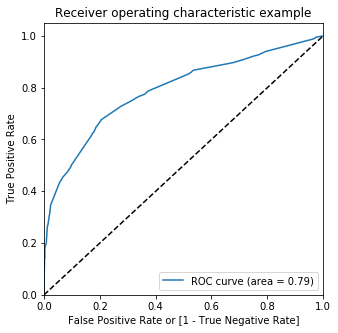

In [343]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

### Finding Optimal Cutoff Point

In [344]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.167411,2363,0,1,1,0,0,0,0,0,0,0,0
1,0,0.167411,5471,0,1,1,0,0,0,0,0,0,0,0
2,1,0.564293,7845,1,1,1,1,1,1,1,0,0,0,0
3,1,0.997129,5804,1,1,1,1,1,1,1,1,1,1,1
4,1,0.855507,64,1,1,1,1,1,1,1,1,1,1,0


In [345]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.446087  1.000000  0.000000
0.1   0.1  0.446087  1.000000  0.000000
0.2   0.2  0.533514  0.939804  0.206313
0.3   0.3  0.698793  0.786748  0.627959
0.4   0.4  0.741049  0.668689  0.799324
0.5   0.5  0.735221  0.627158  0.822247
0.6   0.6  0.721274  0.491834  0.906050
0.7   0.7  0.691507  0.336911  0.977076
0.8   0.8  0.676520  0.296780  0.982337
0.9   0.9  0.650083  0.227252  0.990605


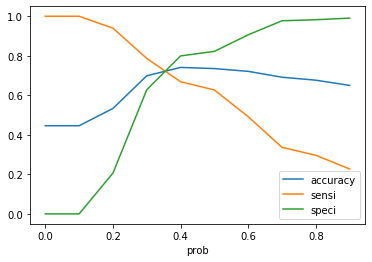

In [346]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.4 is the optimum point to take it as a cutoff probability.

In [347]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.36 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Lead ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.167411,2363,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.167411,5471,0,1,1,0,0,0,0,0,0,0,0,0
2,1,0.564293,7845,1,1,1,1,1,1,1,0,0,0,0,1
3,1,0.997129,5804,1,1,1,1,1,1,1,1,1,1,1,1
4,1,0.855507,64,1,1,1,1,1,1,1,1,1,1,0,1


In [348]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7164862614487927

In [349]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1843,  818],
       [ 544, 1599]])

In [350]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [351]:
# Let us calculate specificity
TN / float(TN+FP)

0.6925967681322811

In [352]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7461502566495567

## Model Evaluation

### Precision and Recall

In [353]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[2188,  473],
       [ 799, 1344]])

In [354]:
#Precision
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7396807925151349

In [355]:
#Recall
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6271581894540365

In [356]:
from sklearn.metrics import precision_score, recall_score


In [357]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7396807925151349

In [358]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.6271581894540365

#### Precision-Recall Curve

In [359]:
from sklearn.metrics import precision_recall_curve

In [360]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       1
 3       1
 4       1
        ..
 4799    0
 4800    0
 4801    1
 4802    0
 4803    0
 Name: Converted, Length: 4804, dtype: int64,
 0       0
 1       0
 2       1
 3       1
 4       1
        ..
 4799    1
 4800    0
 4801    1
 4802    0
 4803    0
 Name: predicted, Length: 4804, dtype: int64)

In [361]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

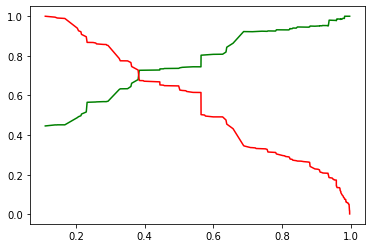

In [362]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Making Predictions on the test set

In [363]:
scaler = StandardScaler()

X_train[['TotalVisits']] = scaler.fit_transform(X_train[['TotalVisits']])
X_train.head()


,TotalVisits,A free copy of Mastering The Interview,Origin_Landing Page Submission,Source_Google,Source_Olark Chat,Source_Reference,Lead Source_Referral Sites,Source_Welingak Website,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Working Professional_Occupation,Other Cities,Other Cities of Maharashtra,Other Metro Cities,Thane & Outskirts,Last Notable Activity_Modified,Last Notable Activity_SMS Sent
2363,-0.499505,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0
5471,0.848029,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
7845,2.869329,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
5804,-1.173271,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1
64,0.174262,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0


In [364]:
X_test = X_test[col]
X_test.head()

,Origin_Landing Page Submission,Source_Reference,Source_Welingak Website,Specialization_Human Resource Management,Specialization_Marketing Management,Specialization_Rural and Agribusiness,Working Professional_Occupation,Other Cities,Last Notable Activity_Modified,Last Notable Activity_SMS Sent
7989,0,1,0,0,0,0,0,0,0,0
3027,1,0,0,1,0,0,0,0,0,0
8445,1,0,0,1,0,0,0,0,0,0
6293,0,0,0,0,0,0,0,1,1,0
2713,1,0,0,0,0,0,0,0,0,1


In [365]:
X_test_sm = sm.add_constant(X_test)

In [366]:
y_test_pred = res.predict(X_test_sm)

In [367]:
y_test_pred[:10]

7989    0.883903
3027    0.363105
8445    0.363105
6293    0.230749
2713    0.571376
5408    0.659039
4872    0.299729
3151    0.986043
5994    0.959990
8072    0.950566
dtype: float64

In [368]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [369]:
# Let's see the head
y_pred_1.head()

,0
7989,0.883903
3027,0.363105
8445,0.363105
6293,0.230749
2713,0.571376


In [370]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [371]:
# Putting LeadID to index
y_test_df['Lead ID'] = y_test_df.index

In [372]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [373]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [374]:
y_pred_final.head()

,Converted,Lead ID,0
0,1,7989,0.883903
1,0,3027,0.363105
2,1,8445,0.363105
3,0,6293,0.230749
4,1,2713,0.571376


In [375]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [376]:
# Rearranging the columns
y_pred_final = y_pred_final[['Lead ID','Converted','Converted_Prob']]

In [377]:
y_pred_final.head()

,Lead ID,Converted,Converted_Prob
0,7989,1,0.883903
1,3027,0,0.363105
2,8445,1,0.363105
3,6293,0,0.230749
4,2713,1,0.571376


In [ ]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.4 else 0)

In [258]:
y_pred_final.head()

,Lead ID,Converted,Converted_Prob,final_predicted
0,5638,1,0.916229,1
1,2076,0,0.182887,0
2,5219,1,0.590579,1
3,3352,0,0.590579,1
4,8697,0,0.466069,1


In [259]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7191011235955056

In [260]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[848, 314],
       [261, 624]])

In [261]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [262]:
# Let us calculate specificity
TN / float(TN+FP)

0.729776247848537

In [263]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7050847457627119

In [264]:
y_pred_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2047 entries, 0 to 2046
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Lead ID          2047 non-null   int64  
 1   Converted        2047 non-null   int64  
 2   Converted_Prob   2047 non-null   float64
 3   final_predicted  2047 non-null   int64  
dtypes: float64(1), int64(3)
memory usage: 64.1 KB


## Generating the Score for Leads

In [265]:
leads_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6823 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Number                             6823 non-null   int64  
 1   Lead Origin                             6823 non-null   object 
 2   Lead Source                             6823 non-null   object 
 3   Converted                               6823 non-null   int64  
 4   TotalVisits                             6823 non-null   float64
 5   Page Views Per Visit                    6823 non-null   float64
 6   Specialization                          6823 non-null   object 
 7   What is your current occupation         6823 non-null   object 
 8   Lead Profile                            6823 non-null   object 
 9   City                                    6823 non-null   object 
 10  A free copy of Mastering The Interview  6823 non-null   int6

In [266]:
leads_final.head()

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Page Views Per Visit,Specialization,What is your current occupation,Lead Profile,City,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,0,0.0,0.0,Not Specified,Unemployed,Potential Lead,Other Cities,0,Modified
1,660728,API,Organic Search,0,5.0,2.5,Not Specified,Unemployed,Potential Lead,Other Cities,0,Email Opened
2,660727,Landing Page Submission,Direct Traffic,1,2.0,2.0,Business Administration,Student,Potential Lead,Mumbai,1,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,1.0,1.0,Media and Advertising,Unemployed,Potential Lead,Mumbai,0,Modified
4,660681,Landing Page Submission,Google,1,2.0,1.0,Not Specified,Unemployed,Potential Lead,Mumbai,0,Modified


In [267]:
# Converting the index column to Lead ID
leads_final['Lead ID'] = leads_final.index

In [268]:
leads_final.head()

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Page Views Per Visit,Specialization,What is your current occupation,Lead Profile,City,A free copy of Mastering The Interview,Last Notable Activity,Lead ID
0,660737,API,Olark Chat,0,0.0,0.0,Not Specified,Unemployed,Potential Lead,Other Cities,0,Modified,0
1,660728,API,Organic Search,0,5.0,2.5,Not Specified,Unemployed,Potential Lead,Other Cities,0,Email Opened,1
2,660727,Landing Page Submission,Direct Traffic,1,2.0,2.0,Business Administration,Student,Potential Lead,Mumbai,1,Email Opened,2
3,660719,Landing Page Submission,Direct Traffic,0,1.0,1.0,Media and Advertising,Unemployed,Potential Lead,Mumbai,0,Modified,3
4,660681,Landing Page Submission,Google,1,2.0,1.0,Not Specified,Unemployed,Potential Lead,Mumbai,0,Modified,4


In [269]:
# Bringing the Lead ID column to begining
columns = leads_final.columns.tolist()
columns = columns[-1:] + columns[:-1]
leads_final = leads_final[columns]
leads_final.head()

,Lead ID,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Page Views Per Visit,Specialization,What is your current occupation,Lead Profile,City,A free copy of Mastering The Interview,Last Notable Activity
0,0,660737,API,Olark Chat,0,0.0,0.0,Not Specified,Unemployed,Potential Lead,Other Cities,0,Modified
1,1,660728,API,Organic Search,0,5.0,2.5,Not Specified,Unemployed,Potential Lead,Other Cities,0,Email Opened
2,2,660727,Landing Page Submission,Direct Traffic,1,2.0,2.0,Business Administration,Student,Potential Lead,Mumbai,1,Email Opened
3,3,660719,Landing Page Submission,Direct Traffic,0,1.0,1.0,Media and Advertising,Unemployed,Potential Lead,Mumbai,0,Modified
4,4,660681,Landing Page Submission,Google,1,2.0,1.0,Not Specified,Unemployed,Potential Lead,Mumbai,0,Modified


In [270]:
leads_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6823 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead ID                                 6823 non-null   int64  
 1   Lead Number                             6823 non-null   int64  
 2   Lead Origin                             6823 non-null   object 
 3   Lead Source                             6823 non-null   object 
 4   Converted                               6823 non-null   int64  
 5   TotalVisits                             6823 non-null   float64
 6   Page Views Per Visit                    6823 non-null   float64
 7   Specialization                          6823 non-null   object 
 8   What is your current occupation         6823 non-null   object 
 9   Lead Profile                            6823 non-null   object 
 10  City                                    6823 non-null   obje

**We can say the Probability calculated on the Converted variable can be the Score.**
> The Leads that have a probability of higher than 75% can be targeted by the Sales Team.

In [271]:
# Merging the Probabilities in Train and Test Data.
y_train_pred_final.head()

,Converted,Converted_Prob,Lead ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.182887,5125,0,1,1,0,0,0,0,0,0,0,0,0
1,1,0.590579,6360,1,1,1,1,1,1,1,0,0,0,0,1
2,0,0.182887,3229,0,1,1,0,0,0,0,0,0,0,0,0
3,0,0.590579,9163,1,1,1,1,1,1,1,0,0,0,0,1
4,1,0.318775,6968,0,1,1,1,1,0,0,0,0,0,0,0


Now we need to extract 'Lead ID' and 'Converted_Prob' from both the y_test_pred_final and y_pred_final

In [272]:
train_prob = y_train_pred_final[['Lead ID','Converted_Prob']].copy()
train_prob.head()

,Lead ID,Converted_Prob
0,5125,0.182887
1,6360,0.590579
2,3229,0.182887
3,9163,0.590579
4,6968,0.318775


In [273]:
test_prob = y_pred_final[['Lead ID','Converted_Prob']].copy()
test_prob.head()

,Lead ID,Converted_Prob
0,5638,0.916229
1,2076,0.182887
2,5219,0.590579
3,3352,0.590579
4,8697,0.466069


Merging the two files

In [274]:
score = pd.concat([test_prob,train_prob],axis=0)
score.head()

,Lead ID,Converted_Prob
0,5638,0.916229
1,2076,0.182887
2,5219,0.590579
3,3352,0.590579
4,8697,0.466069


In [275]:
score.shape

(6823, 2)

In [276]:
# Creating a new column as 'Score'.
score['Lead Score'] = round(score['Converted_Prob']*100,2)

In [277]:
score.head()

,Lead ID,Converted_Prob,Lead Score
0,5638,0.916229,91.62
1,2076,0.182887,18.29
2,5219,0.590579,59.06
3,3352,0.590579,59.06
4,8697,0.466069,46.61


> Now, we will create a new column named 'Hot Lead' to indicate whether the lead is a Hot Lead or Not based on the 'Score' variable.

In [278]:
# Creating the column 'Hot Lead'
score['Hot Lead'] = 0
score.loc[score['Lead Score'] > 70, 'Hot Lead'] = 1

In [279]:
score.head()

,Lead ID,Converted_Prob,Lead Score,Hot Lead
0,5638,0.916229,91.62,1
1,2076,0.182887,18.29,0
2,5219,0.590579,59.06,0
3,3352,0.590579,59.06,0
4,8697,0.466069,46.61,0


In [280]:
score.sort_values(['Lead Score'], ascending = False)

,Lead ID,Converted_Prob,Lead Score,Hot Lead
2166,2763,0.997278,99.73,1
438,4773,0.997278,99.73,1
3025,8098,0.997278,99.73,1
1190,2806,0.997278,99.73,1
448,4771,0.997278,99.73,1
...,...,...,...,...
240,5643,0.014893,1.49,0
1938,5494,0.014893,1.49,0
1488,7122,0.014893,1.49,0
818,6214,0.014893,1.49,0


### Merging the 'Score' dataframe to the original dataset

In [281]:
leads_final = pd.merge(leads_final, score, on='Lead ID')

In [282]:
leads_final.head()

,Lead ID,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Page Views Per Visit,Specialization,What is your current occupation,Lead Profile,City,A free copy of Mastering The Interview,Last Notable Activity,Converted_Prob,Lead Score,Hot Lead
0,0,660737,API,Olark Chat,0,0.0,0.0,Not Specified,Unemployed,Potential Lead,Other Cities,0,Modified,0.241978,24.20,0
1,1,660728,API,Organic Search,0,5.0,2.5,Not Specified,Unemployed,Potential Lead,Other Cities,0,Email Opened,0.400264,40.03,0
2,2,660727,Landing Page Submission,Direct Traffic,1,2.0,2.0,Business Administration,Student,Potential Lead,Mumbai,1,Email Opened,0.318775,31.88,0
3,3,660719,Landing Page Submission,Direct Traffic,0,1.0,1.0,Media and Advertising,Unemployed,Potential Lead,Mumbai,0,Modified,0.182887,18.29,0
4,4,660681,Landing Page Submission,Google,1,2.0,1.0,Not Specified,Unemployed,Potential Lead,Mumbai,0,Modified,0.182887,18.29,0


In [283]:
leads_final = leads_final.sort_values(['Lead Score'], ascending=False)

In [284]:
leads_final

,Lead ID,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Page Views Per Visit,Specialization,What is your current occupation,Lead Profile,City,A free copy of Mastering The Interview,Last Notable Activity,Converted_Prob,Lead Score,Hot Lead
4214,5792,605318,Lead Add Form,Reference,1,0.0,0.00,Marketing Management,Working Professional,Potential Lead,Other Cities,0,SMS Sent,0.997278,99.73,1
2241,3069,630550,Lead Add Form,Reference,1,0.0,0.00,Marketing Management,Working Professional,Potential Lead,Other Cities,0,SMS Sent,0.997278,99.73,1
1944,2684,633914,Lead Add Form,Reference,1,0.0,0.00,Human Resource Management,Working Professional,Potential Lead,Other Cities,0,SMS Sent,0.997278,99.73,1
1946,2686,633910,Lead Add Form,Reference,1,0.0,0.00,Operations Management,Working Professional,Potential Lead,Other Cities,0,SMS Sent,0.997278,99.73,1
1947,2687,633903,Lead Add Form,Reference,1,0.0,0.00,Business Administration,Working Professional,Potential Lead,Other Cities,0,SMS Sent,0.997278,99.73,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4513,6214,602101,Landing Page Submission,Direct Traffic,0,1.0,1.00,Retail Management,Unemployed,Student of SomeSchool,Other Cities,1,Modified,0.014893,1.49,0
5428,7373,592869,Landing Page Submission,Direct Traffic,0,5.0,5.00,E-COMMERCE,Unemployed,Student of SomeSchool,Other Cities,1,Modified,0.014893,1.49,0
3991,5494,607756,Landing Page Submission,Direct Traffic,0,13.0,3.25,IT Projects Management,Unemployed,Student of SomeSchool,Other Cities,0,Modified,0.014893,1.49,0
5245,7122,594849,Landing Page Submission,Direct Traffic,0,1.0,1.00,Not Specified,Unemployed,Student of SomeSchool,Other Cities,0,Modified,0.014893,1.49,0


In [285]:
Hot_leads = leads_final[leads_final['Hot Lead']==1].copy()

In [286]:
Hot_leads

,Lead ID,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Page Views Per Visit,Specialization,What is your current occupation,Lead Profile,City,A free copy of Mastering The Interview,Last Notable Activity,Converted_Prob,Lead Score,Hot Lead
4214,5792,605318,Lead Add Form,Reference,1,0.0,0.0,Marketing Management,Working Professional,Potential Lead,Other Cities,0,SMS Sent,0.997278,99.73,1
2241,3069,630550,Lead Add Form,Reference,1,0.0,0.0,Marketing Management,Working Professional,Potential Lead,Other Cities,0,SMS Sent,0.997278,99.73,1
1944,2684,633914,Lead Add Form,Reference,1,0.0,0.0,Human Resource Management,Working Professional,Potential Lead,Other Cities,0,SMS Sent,0.997278,99.73,1
1946,2686,633910,Lead Add Form,Reference,1,0.0,0.0,Operations Management,Working Professional,Potential Lead,Other Cities,0,SMS Sent,0.997278,99.73,1
1947,2687,633903,Lead Add Form,Reference,1,0.0,0.0,Business Administration,Working Professional,Potential Lead,Other Cities,0,SMS Sent,0.997278,99.73,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4700,6454,600437,API,Olark Chat,1,0.0,0.0,Finance Management,Unemployed,Potential Lead,Mumbai,0,SMS Sent,0.772713,77.27,1
6217,8460,585325,API,Google,1,2.0,2.0,Operations Management,Unemployed,Other Leads,Mumbai,0,SMS Sent,0.772713,77.27,1
4137,5686,606393,API,Google,1,2.0,2.0,Operations Management,Unemployed,Potential Lead,Mumbai,0,SMS Sent,0.772713,77.27,1
6253,8504,584779,API,Olark Chat,0,2.0,2.0,Business Administration,Unemployed,Potential Lead,Thane & Outskirts,0,SMS Sent,0.772713,77.27,1


In [287]:
Hot_leads = Hot_leads.drop(['Lead ID'], axis = 1)

In [288]:
Hot_leads

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Page Views Per Visit,Specialization,What is your current occupation,Lead Profile,City,A free copy of Mastering The Interview,Last Notable Activity,Converted_Prob,Lead Score,Hot Lead
4214,605318,Lead Add Form,Reference,1,0.0,0.0,Marketing Management,Working Professional,Potential Lead,Other Cities,0,SMS Sent,0.997278,99.73,1
2241,630550,Lead Add Form,Reference,1,0.0,0.0,Marketing Management,Working Professional,Potential Lead,Other Cities,0,SMS Sent,0.997278,99.73,1
1944,633914,Lead Add Form,Reference,1,0.0,0.0,Human Resource Management,Working Professional,Potential Lead,Other Cities,0,SMS Sent,0.997278,99.73,1
1946,633910,Lead Add Form,Reference,1,0.0,0.0,Operations Management,Working Professional,Potential Lead,Other Cities,0,SMS Sent,0.997278,99.73,1
1947,633903,Lead Add Form,Reference,1,0.0,0.0,Business Administration,Working Professional,Potential Lead,Other Cities,0,SMS Sent,0.997278,99.73,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4700,600437,API,Olark Chat,1,0.0,0.0,Finance Management,Unemployed,Potential Lead,Mumbai,0,SMS Sent,0.772713,77.27,1
6217,585325,API,Google,1,2.0,2.0,Operations Management,Unemployed,Other Leads,Mumbai,0,SMS Sent,0.772713,77.27,1
4137,606393,API,Google,1,2.0,2.0,Operations Management,Unemployed,Potential Lead,Mumbai,0,SMS Sent,0.772713,77.27,1
6253,584779,API,Olark Chat,0,2.0,2.0,Business Administration,Unemployed,Potential Lead,Thane & Outskirts,0,SMS Sent,0.772713,77.27,1


#### We can see that, after performing Logistic Regression, we have 1055 leads, that have high chances of converting.

In [289]:
## Conversion Rate
converted = (sum(Hot_leads['Converted'])/len(Hot_leads['Converted'].index))*100
converted

91.8483412322275